# Machine Learning and Artificial Inteligence in Diagnostic Medicine

Healthcare needs technology to scale.

Today, only about 10% of 7B population in the world have access to good healthcare service, and half of the world don’t even access to essential health services. Even among the developed countries, healthcare system is under strain, with rising cost and long wait time. To train enough physicians and caregivers for the growing demands within a short period of time is impractical, if not impossible. The solution has to involve technological breakthroughs.

And that’s where Machine Learning (ML) and Artificial Intelligence (AI) can make a big impact.


According to yourhealth.co.ke, at government facilites; <br>
          On average, a CT scan costs between Sh 5,000 and Sh 12,000. <br>
          Magnetic Resonance Imaging (MRI) costs between Sh16,000 to Sh 33,000. <br>
          Ultrasound costs between Sh 600 and Sh4,000 while<br>
          x-rays cost between Sh 1,200 and Sh 3,000 depending on the facility.<br> 


Chest x-rays (CXRs) are the most common type of medical imaging, often 2x-10x more than other advanced imaging methods such as MRI, CT scans, PET scans.Some reasons that CXRs are popular include: <br>
        (1) lower dose of radiation;<br> 
        (2) lower cost; <br>
        (3) it needs only less than a minute to take an image (compared with, say, an hour or more for a CT scan). <br>
As the result, CXRs are widely used as a screening tool. If there’s something wrong in your lungs that requires more evidence to diagnose, your doctor usually first prescribe a CXR.

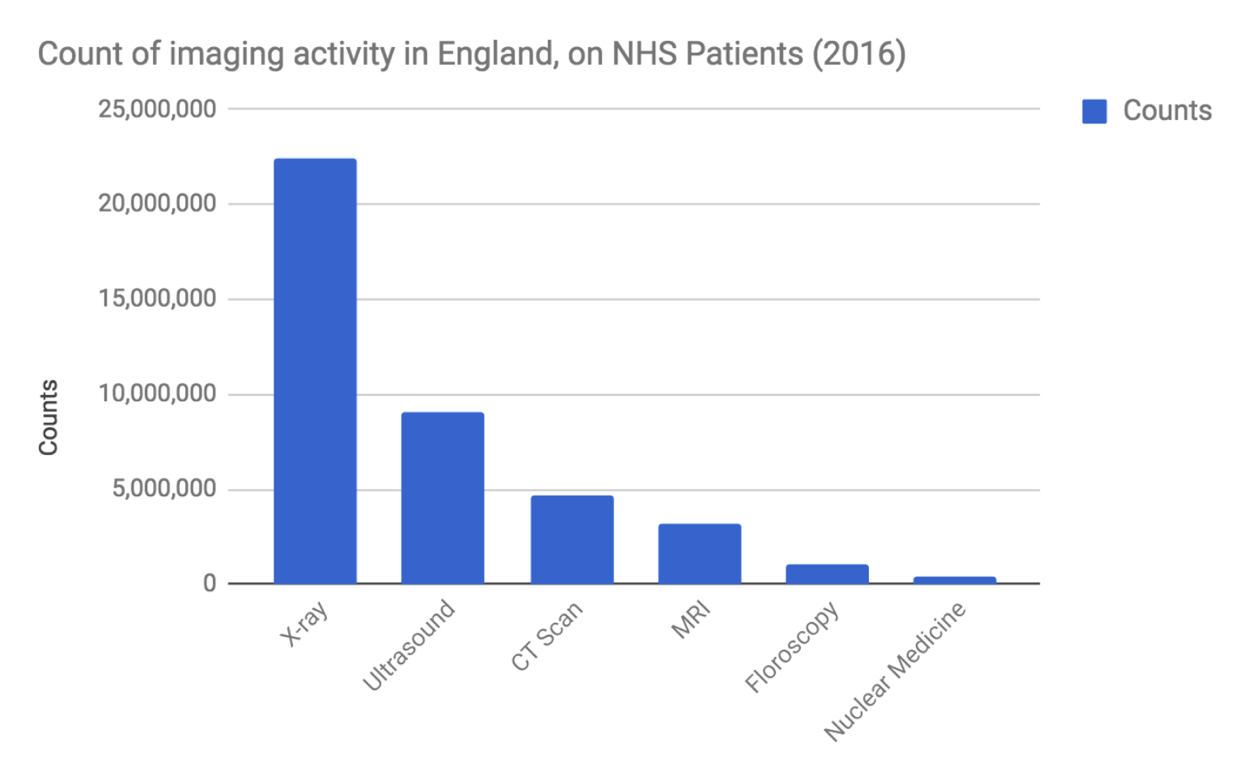

In [4]:
from IPython.display import Image
Image(filename='NHS.jpeg', width=600, height=600)

Among the 20+ million X-rays, over 8 millions are chest x-rays, making chest x-rays the most common standardized medical imaging. (source:https://www.england.nhs.uk/statistics/statistical-work-areas/diagnostic-imaging-dataset/)

## Pneumonia

By definition, pneumonia is a form of acute respiratory infection that affects the lungs. 
The lungs are made up of small sacs called alveoli, which fill with air when a healthy person breathes. When an individual has pneumonia, the alveoli are filled with pus and fluid, which makes breathing painful and limits oxygen intake. <br>


According to the World Health Organization(WHO), pneumonia is the single largest infectious cause of death in children worldwide. Pneumonia killed 808 694 children under the age of 5 in 2017, accounting for 15% of all deaths of children under five years old. Pneumonia affects children and families everywhere, but is most prevalent in South Asia and sub-Saharan Africa. Children can be protected from pneumonia, it can be prevented with simple interventions, and treated with low-cost, low-tech medication and care.

Causes:

Pneumonia is caused by a number of infectious agents, including viruses, bacteria and fungi. 
The most common are: <br>

   1.Streptococcus pneumoniae – the most common cause of bacterial pneumonia in children; <br>
   2.Haemophilus influenzae type b (Hib) – the second most common cause of bacterial pneumonia; <br>
   3.Respiratory syncytial virus is the most common viral cause of pneumonia; <br>
   4.In infants infected with HIV, Pneumocystis jiroveci (a fungus) is one of the most common causes of pneumonia, responsible for at least one quarter of all pneumonia deaths in HIV-infected infants.


Diagnosis:<br>
    Chest X-ray (CXR) is considered the gold standard for diagnosis of pneumonia. <br>
    Other diagnostic techniques include: blood tests,sputum tests, lung biopsy, thoracocentesis(draining fluid from rib cage for testing) and bronchoscopy.

## The Dataset

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou China. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Acknowledgements: <br>
Data: https://data.mendeley.com/datasets/rscbjbr9sj/2

Inspiration:
Automated methods to detect and classify human diseases from medical images.


## Organ Segmentation in CXR

A fundamental task in understanding CXR is to recognize the lung fields and the heart regions:

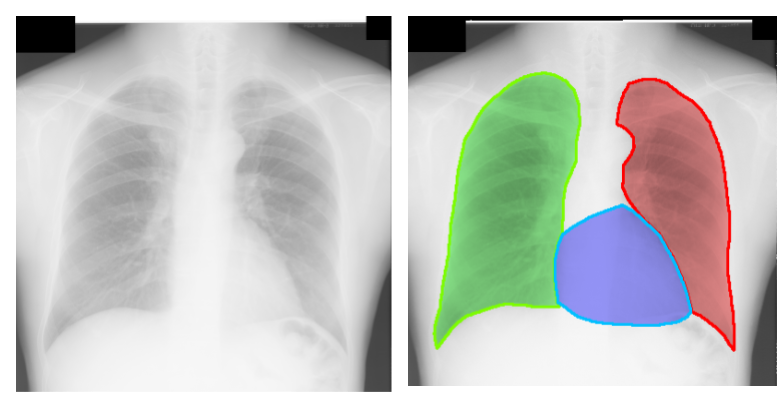

In [5]:
Image(filename='CXR2_image.jpeg', width=600, height=600)

Left: CXR from Japanese Society of Radiology Technology. Right: The same CXR overlaid with human labeled left lung, right lung, and heart contours.

## Machine Learning Model

Have you ever wondered how and what a computer sees?

RGB color space or RGB color system, constructs all the colors from the combination of the Red, Green and Blue colors.
The red, green and blue use 8 bits each, which have integer values from 0 to 255. This makes 256*256*256=16,777,216 possible colors. <br>

RGB system is used both by computers and human neurons to recognize/characterise colors.

RGB ≡ Red, Green, Blue

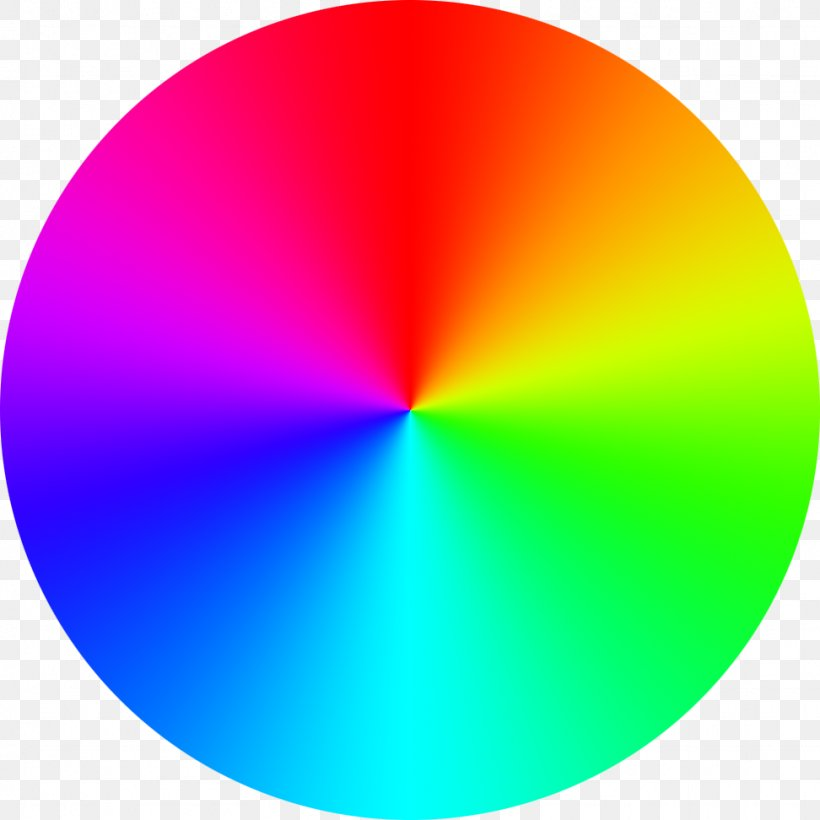

In [6]:
Image(filename='rgb.jpg', width=300, height=300)

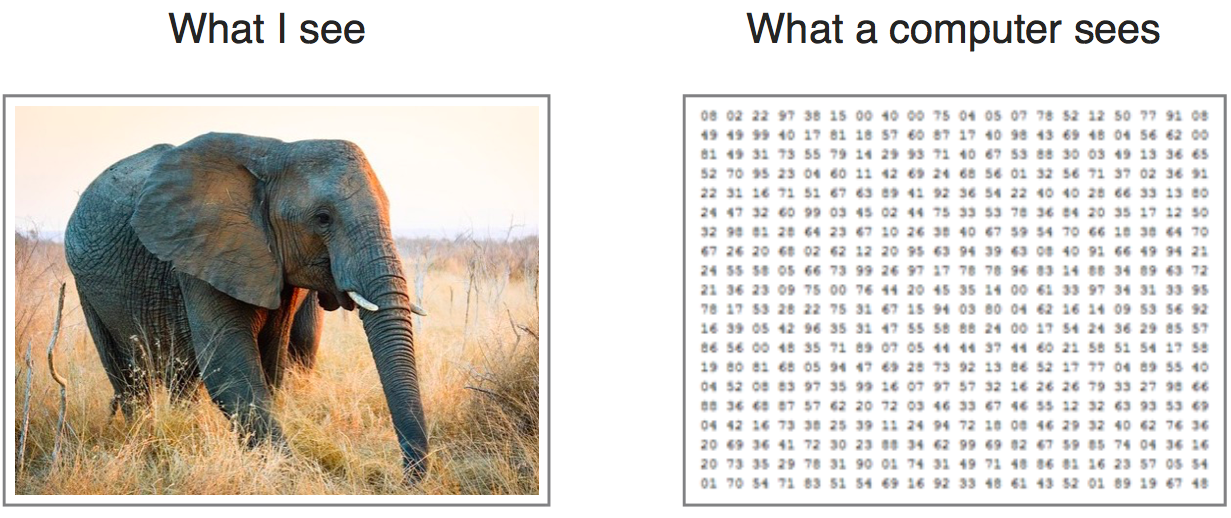

In [7]:
Image(filename='elephant_image.jpeg', width = 600, height= 600)

For humans, the task of image recognition is one of the first skills we learn from the moment we are born and is one that comes naturally and effortlessly as adults. Without even thinking twice, we’re able to quickly and seamlessly identify the environment we are in as well as the objects that surround us.

These skills of being able to quickly recognize patterns, generalize from prior knowledge, and adapt to different image environments are ones that we do not share with our fellow machines.

When a computer sees an image (takes an image as input), it will see an array of pixel values. Depending on the resolution and size of the image, it will see a 32 x 32 x 3 array of numbers (The 3 refers to RGB values). Just to drive home the point, let's say we have a color image in JPG form and its size is 480 x 480. The representative array will be 480 x 480 x 3. Each of these numbers is given a value from 0 to 255 which describes the pixel intensity at that point. These numbers, while meaningless to us when we perform image classification, are the only inputs available to the computer.

A Convolutional Neural Network is a special type of an Artificial Intelligence implementation which uses a special mathematical matrix manipulation called the convolution operation to process data from the images.

## Visualization

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [9]:
import os
paths = os.listdir(path="C:/Users/user/Desktop/Muchiri Python/Data_Science/DS_Project/chest_xray/")
print(paths)

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [10]:
train_folder= '../DS_Project/chest_xray/chest_xray/train/'
val_folder = '../DS_Project/chest_xray/chest_xray/val/'
test_folder = '../DS_Project/chest_xray/chest_xray/test/'

In [11]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

# validate
os.listdir(val_folder)
val_n = val_folder+'NORMAL/'
val_p = val_folder+'PNEUMONIA/'

# test
os.listdir(test_folder)
test_n = test_folder+'NORMAL/'
test_p = test_folder+'PNEUMONIA/'

In [12]:
# Get the list of all the images
normal_cases = glob(train_folder+"/NORMAL/*.jpeg")
pneumonia_cases = glob(train_folder+"/PNEUMONIA/*.jpeg")

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,../DS_Project/chest_xray/chest_xray/train//NOR...,0
1,../DS_Project/chest_xray/chest_xray/train//PNE...,1
2,../DS_Project/chest_xray/chest_xray/train//PNE...,1
3,../DS_Project/chest_xray/chest_xray/train//PNE...,1
4,../DS_Project/chest_xray/chest_xray/train//PNE...,1


1    3875
0    1341
Name: label, dtype: int64


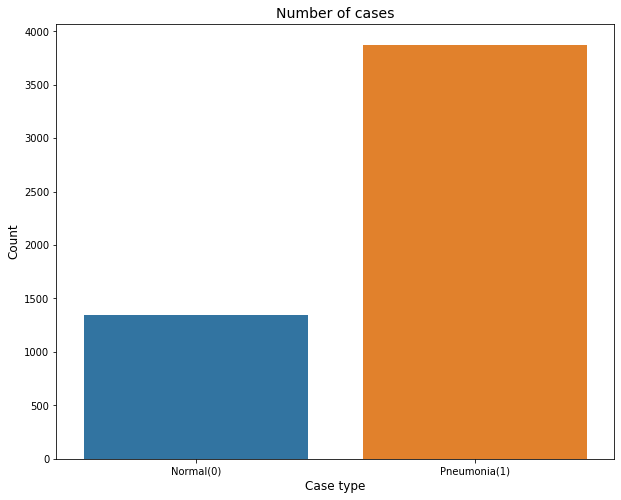

In [13]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

## Normal

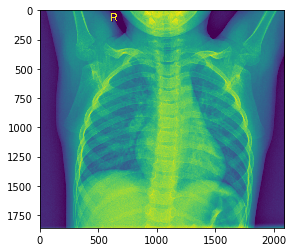

In [14]:
img = glob(train_folder+"/NORMAL/*.jpeg") #Getting all images in this folder

img = np.asarray(plt.imread(img[0]))
plt.imshow(img)

In [15]:
img.shape

(1858, 2090)

## Pneumonia

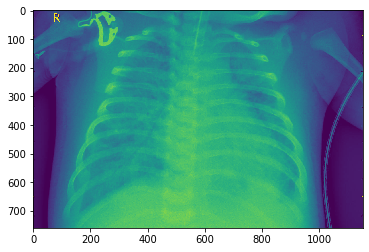

In [16]:
img = glob(train_folder+"/PNEUMONIA/*.jpeg") #Getting all images in this folder

img = np.asarray(plt.imread(img[0]))
plt.imshow(img)

In [17]:
img.shape

(760, 1152)

1342
normal picture title:  IM-0485-0001.jpeg
pneumonia picture title: person1157_virus_1937.jpeg


Text(0.5, 1.0, 'Pneumonia')

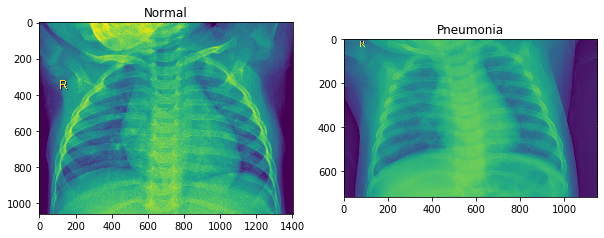

In [18]:
import PIL.Image

#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(50,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(60,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = PIL.Image.open(norm_pic_address)
sic_load = PIL.Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

Text(0.5, 1.0, 'Pneumonia')

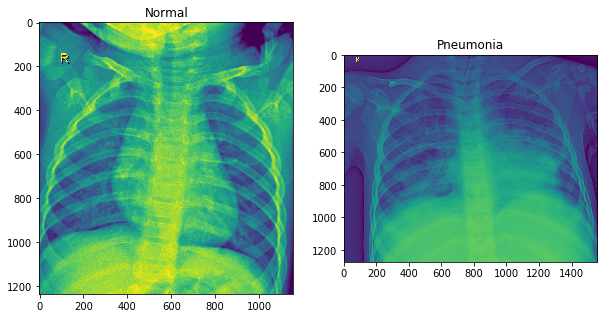

In [19]:
img_n = glob(train_folder+"/NORMAL/*.jpeg")
img_p = glob(train_folder+"/PNEUMONIA/*.jpeg")

figure = plt.figure(figsize=(10,10))

fig1 = figure.add_subplot(1,2,1)
img1 = np.asarray(plt.imread(img_n[12]))
plt.imshow(img1)
fig1.set_title('Normal')

fig2 = figure.add_subplot(1,2,2)
img2 = np.asarray(plt.imread(img_p[2500]))
plt.imshow(img2)
fig2.set_title('Pneumonia')

When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection. This exam will also help determine if you have any complications related to pneumonia such as abscesses or pleural effusions (fluid surrounding the lungs). <br>

<br>
As seen with all the above illustrations, infiltrates are present in lungs infected with pneumonia.

## Data Normalization
Database normalization is the process of structuring a relational database in accordance with a series of so-called normal forms in order to reduce data redundancy and improve data integrity. -Wikipedia

In [20]:
imagePatches = glob('../DS_project/chest_xray/chest_xray/**/**/*.jpeg', recursive=True)
print('Total number of images in the dataset:',len(imagePatches))

Total number of images in the dataset: 17568


In [21]:
import cv2
import skimage
from skimage.transform import resize
from tqdm import tqdm 

In [22]:
TRAIN_DIR = "../DS_Project/chest_xray/chest_xray/train/"
TEST_DIR =  "../DS_Project/chest_xray/chest_xray/test/"

In [23]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [24]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [25]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [26]:
X_train, y_train = get_data(TRAIN_DIR)

100%|██████████| 3876/3876 [50:20<00:00,  1.28it/s]  


In [35]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 390/390 [03:49<00:00,  1.70it/s]


In [28]:
print(X_train.shape,'\n',X_test.shape)

(5216, 150, 150, 3) 
 (624, 150, 150, 3)


In [29]:
print(y_train.shape,'\n',y_test.shape)

(5216,) 
 (624,)


In [30]:
print('Shape of the image vector: ',X_train[0].shape)

Shape of the image vector:  (150, 150, 3)


In [31]:
X_train_list = list(X_train)
y_train_list = list(y_train)

labels_list = []

def retrieve_labels(y_train):
    for label in y_train_list:

        if label == 0:
            print('NORMAL')
            labels_list.append('NORMAL')
        else:
            print('PNEUMONIA')
            labels_list.append('PNEUMONIA')

print(retrieve_labels(y_train))


NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL

NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL
NORMAL

PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA


PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA


PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA


Text(0.5, 1.0, 'PNEUMONIA')

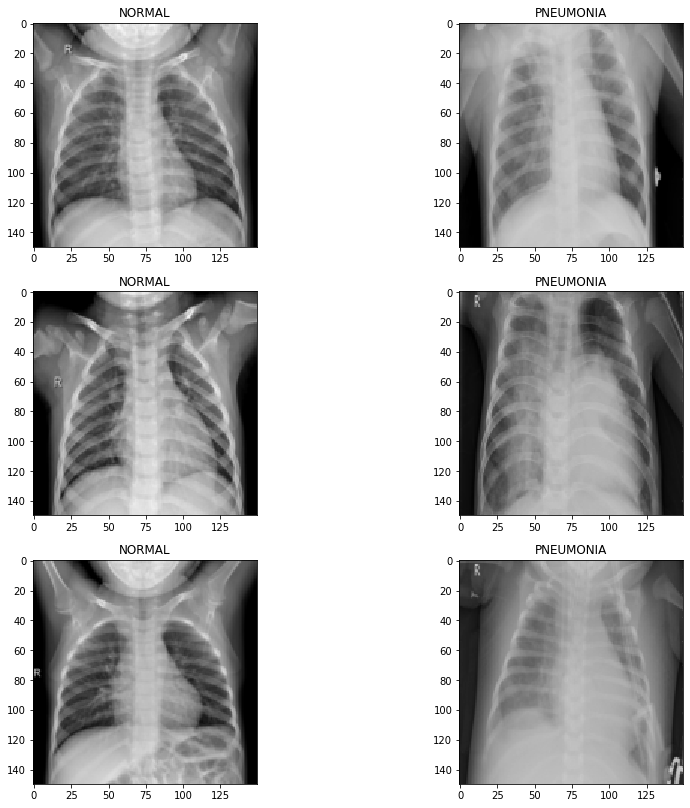

In [32]:
figure = plt.figure(figsize=(14,14))

fig1 = figure.add_subplot(3,2,1)

plt.imshow(X_train[300])
fig1.set_title(labels_list[300])

fig2 = figure.add_subplot(3,2,2)
plt.imshow(X_train[2500])
fig2.set_title(labels_list[2500])

fig3 = figure.add_subplot(3,2,3)
plt.imshow(X_train[68])
fig3.set_title(labels_list[68])

fig4 = figure.add_subplot(3,2,4)
plt.imshow(X_train[2329])
fig4.set_title(labels_list[2329])

fig5 = figure.add_subplot(3,2,5)
plt.imshow(X_train[399])
fig5.set_title(labels_list[399])

fig6 = figure.add_subplot(3,2,6)
plt.imshow(X_train[4999])
fig6.set_title(labels_list[4999])

In [36]:
from tensorflow.keras import datasets, layers, models

In [91]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [92]:
batch_size = 256
epochs = 1

In [93]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
5216/5216 [==============================] - ETA: 14:00 - loss: 0.6903 - acc: 0.50 - ETA: 14:14 - loss: 0.6385 - acc: 0.60 - ETA: 15:58 - loss: 0.7083 - acc: 0.61 - ETA: 14:37 - loss: 0.6792 - acc: 0.64 - ETA: 13:32 - loss: 0.6777 - acc: 0.64 - ETA: 12:35 - loss: 0.6710 - acc: 0.67 - ETA: 11:49 - loss: 0.6715 - acc: 0.66 - ETA: 11:28 - loss: 0.6673 - acc: 0.67 - ETA: 11:18 - loss: 0.6601 - acc: 0.69 - ETA: 10:52 - loss: 0.6603 - acc: 0.68 - ETA: 10:29 - loss: 0.6539 - acc: 0.68 - ETA: 10:12 - loss: 0.6432 - acc: 0.69 - ETA: 10:01 - loss: 0.6370 - acc: 0.70 - ETA: 9:40 - loss: 0.6313 - acc: 0.7076 - ETA: 9:24 - loss: 0.6205 - acc: 0.716 - ETA: 9:14 - loss: 0.6175 - acc: 0.718 - ETA: 9:03 - loss: 0.6139 - acc: 0.720 - ETA: 8:53 - loss: 0.6154 - acc: 0.720 - ETA: 8:45 - loss: 0.6198 - acc: 0.713 - ETA: 8:40 - loss: 0.6199 - acc: 0.717 - ETA: 8:34 - loss: 0.6196 - acc: 0.720 - ETA: 8:29 - loss: 0.6182 - acc: 0.724 - ETA: 8:25 - loss: 0.6192 - 

In [94]:
print('Accuracy of train is:',history.history['acc'])
print('Accuracy of test is:',history.history['val_acc'])
print()
print('These are largely useless metrices for medical diagnostic tools!')

Accuracy of train is: [0.842408]
Accuracy of test is: [0.74038464]

These are largely useless metrices for medical diagnostic tools!


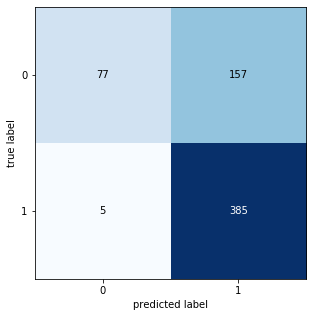

In [95]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test)

CM = confusion_matrix(y_test, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

  ## Sensitivity and Specificity
  Sensitivity (also called the true positive rate, the recall, or probability of detection) measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition). <br>
  
   Sensitivity = TP/Actual YES <br>
    
   Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).<br>
   
   Specificity = TN/Actual NO

In [97]:
print('Sensitivity is: ', (385/(385+5))*100)
print('Specificity is: ', (77/(77+157))*100 )

Sensitivity is:  98.71794871794873
Specificity is:  32.9059829059829


In [98]:
batch_size = 256
epochs = 10

In [99]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - ETA: 8:41 - loss: 0.1481 - acc: 0.968 - ETA: 8:43 - loss: 0.1720 - acc: 0.953 - ETA: 10:20 - loss: 0.1643 - acc: 0.94 - ETA: 10:56 - loss: 0.2139 - acc: 0.93 - ETA: 12:16 - loss: 0.1892 - acc: 0.95 - ETA: 13:14 - loss: 0.1752 - acc: 0.95 - ETA: 14:10 - loss: 0.1602 - acc: 0.95 - ETA: 14:14 - loss: 0.1657 - acc: 0.94 - ETA: 14:19 - loss: 0.1627 - acc: 0.95 - ETA: 13:28 - loss: 0.1715 - acc: 0.94 - ETA: 12:55 - loss: 0.1676 - acc: 0.94 - ETA: 12:23 - loss: 0.1652 - acc: 0.94 - ETA: 11:56 - loss: 0.1663 - acc: 0.94 - ETA: 11:28 - loss: 0.1688 - acc: 0.94 - ETA: 11:04 - loss: 0.1663 - acc: 0.94 - ETA: 10:41 - loss: 0.1666 - acc: 0.94 - ETA: 10:25 - loss: 0.1712 - acc: 0.93 - ETA: 10:12 - loss: 0.1742 - acc: 0.93 - ETA: 9:54 - loss: 0.1817 - acc: 0.9342 - ETA: 9:40 - loss: 0.1830 - acc: 0.934 - ETA: 9:27 - loss: 0.1793 - acc: 0.934 - ETA: 9:16 - loss: 0.1780 - acc: 0.934 - ETA: 9:11 - loss

5216/5216 [==============================] - ETA: 8:29 - loss: 0.0685 - acc: 0.968 - ETA: 8:35 - loss: 0.0911 - acc: 0.953 - ETA: 8:15 - loss: 0.0802 - acc: 0.958 - ETA: 7:36 - loss: 0.0645 - acc: 0.968 - ETA: 7:42 - loss: 0.0779 - acc: 0.962 - ETA: 7:29 - loss: 0.1300 - acc: 0.953 - ETA: 7:27 - loss: 0.1237 - acc: 0.955 - ETA: 7:24 - loss: 0.1429 - acc: 0.953 - ETA: 7:32 - loss: 0.1395 - acc: 0.951 - ETA: 7:20 - loss: 0.1301 - acc: 0.953 - ETA: 7:10 - loss: 0.1320 - acc: 0.954 - ETA: 7:04 - loss: 0.1249 - acc: 0.958 - ETA: 7:08 - loss: 0.1221 - acc: 0.956 - ETA: 7:10 - loss: 0.1243 - acc: 0.955 - ETA: 7:31 - loss: 0.1344 - acc: 0.950 - ETA: 7:24 - loss: 0.1347 - acc: 0.949 - ETA: 7:16 - loss: 0.1367 - acc: 0.948 - ETA: 7:11 - loss: 0.1336 - acc: 0.949 - ETA: 7:09 - loss: 0.1284 - acc: 0.952 - ETA: 7:05 - loss: 0.1241 - acc: 0.954 - ETA: 7:04 - loss: 0.1230 - acc: 0.955 - ETA: 7:04 - loss: 0.1208 - acc: 0.956 - ETA: 7:02 - loss: 0.1265 - acc: 0.955 - ETA: 6:56 - loss: 0.1330 - acc: 0.9

5216/5216 [==============================] - ETA: 8:53 - loss: 0.0397 - acc: 1.000 - ETA: 23:06 - loss: 0.0607 - acc: 1.00 - ETA: 23:00 - loss: 0.0679 - acc: 1.00 - ETA: 20:36 - loss: 0.0843 - acc: 0.99 - ETA: 17:27 - loss: 0.0991 - acc: 0.96 - ETA: 15:17 - loss: 0.0978 - acc: 0.97 - ETA: 14:11 - loss: 0.0976 - acc: 0.96 - ETA: 13:37 - loss: 0.0990 - acc: 0.96 - ETA: 12:48 - loss: 0.0926 - acc: 0.96 - ETA: 12:09 - loss: 0.0873 - acc: 0.96 - ETA: 11:27 - loss: 0.0932 - acc: 0.96 - ETA: 11:03 - loss: 0.0907 - acc: 0.96 - ETA: 10:42 - loss: 0.0994 - acc: 0.96 - ETA: 10:18 - loss: 0.0967 - acc: 0.96 - ETA: 10:02 - loss: 0.0996 - acc: 0.96 - ETA: 9:46 - loss: 0.1177 - acc: 0.9570 - ETA: 9:33 - loss: 0.1149 - acc: 0.957 - ETA: 9:19 - loss: 0.1154 - acc: 0.958 - ETA: 9:31 - loss: 0.1153 - acc: 0.958 - ETA: 9:33 - loss: 0.1203 - acc: 0.956 - ETA: 9:25 - loss: 0.1162 - acc: 0.958 - ETA: 9:13 - loss: 0.1131 - acc: 0.958 - ETA: 9:00 - loss: 0.1146 - acc: 0.957 - ETA: 8:51 - loss: 0.1130 - acc: 0.

5216/5216 [==============================] - ETA: 6:27 - loss: 0.1340 - acc: 0.968 - ETA: 6:48 - loss: 0.1080 - acc: 0.968 - ETA: 6:46 - loss: 0.1118 - acc: 0.979 - ETA: 9:43 - loss: 0.1031 - acc: 0.976 - ETA: 9:51 - loss: 0.1038 - acc: 0.975 - ETA: 9:19 - loss: 0.1010 - acc: 0.974 - ETA: 8:57 - loss: 0.0960 - acc: 0.977 - ETA: 8:48 - loss: 0.0936 - acc: 0.972 - ETA: 8:29 - loss: 0.0893 - acc: 0.972 - ETA: 8:15 - loss: 0.0882 - acc: 0.975 - ETA: 8:00 - loss: 0.0913 - acc: 0.974 - ETA: 7:59 - loss: 0.0938 - acc: 0.974 - ETA: 7:57 - loss: 0.0942 - acc: 0.973 - ETA: 7:46 - loss: 0.0919 - acc: 0.973 - ETA: 7:40 - loss: 0.0885 - acc: 0.975 - ETA: 7:30 - loss: 0.0862 - acc: 0.976 - ETA: 7:28 - loss: 0.0902 - acc: 0.976 - ETA: 7:16 - loss: 0.0954 - acc: 0.974 - ETA: 7:03 - loss: 0.0912 - acc: 0.975 - ETA: 7:04 - loss: 0.0872 - acc: 0.976 - ETA: 7:00 - loss: 0.0875 - acc: 0.976 - ETA: 6:56 - loss: 0.0855 - acc: 0.977 - ETA: 6:51 - loss: 0.0882 - acc: 0.975 - ETA: 6:48 - loss: 0.0875 - acc: 0.9

5216/5216 [==============================] - ETA: 10:26 - loss: 0.0861 - acc: 0.96 - ETA: 11:42 - loss: 0.0646 - acc: 0.98 - ETA: 12:07 - loss: 0.0593 - acc: 0.97 - ETA: 10:42 - loss: 0.0545 - acc: 0.97 - ETA: 11:08 - loss: 0.0654 - acc: 0.97 - ETA: 10:24 - loss: 0.0654 - acc: 0.97 - ETA: 9:44 - loss: 0.0595 - acc: 0.9777 - ETA: 9:15 - loss: 0.0620 - acc: 0.976 - ETA: 8:54 - loss: 0.0617 - acc: 0.975 - ETA: 8:39 - loss: 0.0575 - acc: 0.978 - ETA: 8:27 - loss: 0.0734 - acc: 0.977 - ETA: 8:19 - loss: 0.0712 - acc: 0.976 - ETA: 8:18 - loss: 0.0699 - acc: 0.976 - ETA: 8:09 - loss: 0.0660 - acc: 0.977 - ETA: 7:58 - loss: 0.0706 - acc: 0.975 - ETA: 7:43 - loss: 0.0663 - acc: 0.976 - ETA: 7:57 - loss: 0.0723 - acc: 0.974 - ETA: 8:19 - loss: 0.0795 - acc: 0.972 - ETA: 8:38 - loss: 0.0782 - acc: 0.972 - ETA: 8:34 - loss: 0.0863 - acc: 0.970 - ETA: 8:38 - loss: 0.0878 - acc: 0.970 - ETA: 8:50 - loss: 0.0855 - acc: 0.971 - ETA: 8:54 - loss: 0.0846 - acc: 0.971 - ETA: 8:52 - loss: 0.0825 - acc: 0.

5216/5216 [==============================] - ETA: 7:07 - loss: 0.0953 - acc: 0.968 - ETA: 7:03 - loss: 0.0590 - acc: 0.984 - ETA: 7:25 - loss: 0.0537 - acc: 0.989 - ETA: 7:04 - loss: 0.0437 - acc: 0.992 - ETA: 7:10 - loss: 0.0432 - acc: 0.993 - ETA: 8:27 - loss: 0.0441 - acc: 0.994 - ETA: 9:30 - loss: 0.0534 - acc: 0.991 - ETA: 9:53 - loss: 0.0488 - acc: 0.992 - ETA: 10:13 - loss: 0.0533 - acc: 0.98 - ETA: 9:44 - loss: 0.0596 - acc: 0.9844 - ETA: 9:23 - loss: 0.0580 - acc: 0.985 - ETA: 9:11 - loss: 0.0544 - acc: 0.987 - ETA: 9:00 - loss: 0.0504 - acc: 0.988 - ETA: 8:47 - loss: 0.0482 - acc: 0.988 - ETA: 8:30 - loss: 0.0457 - acc: 0.989 - ETA: 8:18 - loss: 0.0471 - acc: 0.988 - ETA: 8:07 - loss: 0.0502 - acc: 0.987 - ETA: 8:02 - loss: 0.0494 - acc: 0.987 - ETA: 7:54 - loss: 0.0476 - acc: 0.988 - ETA: 7:48 - loss: 0.0470 - acc: 0.989 - ETA: 7:39 - loss: 0.0565 - acc: 0.986 - ETA: 7:32 - loss: 0.0569 - acc: 0.985 - ETA: 7:25 - loss: 0.0567 - acc: 0.985 - ETA: 7:20 - loss: 0.0572 - acc: 0.

5216/5216 [==============================] - ETA: 11:13 - loss: 0.1026 - acc: 0.96 - ETA: 12:59 - loss: 0.0711 - acc: 0.98 - ETA: 12:48 - loss: 0.0516 - acc: 0.98 - ETA: 16:53 - loss: 0.0502 - acc: 0.98 - ETA: 14:36 - loss: 0.0712 - acc: 0.96 - ETA: 13:11 - loss: 0.0725 - acc: 0.96 - ETA: 12:11 - loss: 0.0680 - acc: 0.96 - ETA: 11:37 - loss: 0.0642 - acc: 0.97 - ETA: 11:02 - loss: 0.0623 - acc: 0.97 - ETA: 10:30 - loss: 0.0594 - acc: 0.97 - ETA: 10:02 - loss: 0.0589 - acc: 0.98 - ETA: 9:41 - loss: 0.0549 - acc: 0.9818 - ETA: 9:26 - loss: 0.0530 - acc: 0.983 - ETA: 9:05 - loss: 0.0533 - acc: 0.982 - ETA: 8:52 - loss: 0.0565 - acc: 0.981 - ETA: 8:41 - loss: 0.0534 - acc: 0.982 - ETA: 8:28 - loss: 0.0566 - acc: 0.981 - ETA: 8:19 - loss: 0.0573 - acc: 0.979 - ETA: 8:13 - loss: 0.0551 - acc: 0.980 - ETA: 8:00 - loss: 0.0526 - acc: 0.981 - ETA: 7:57 - loss: 0.0507 - acc: 0.982 - ETA: 7:49 - loss: 0.0497 - acc: 0.983 - ETA: 7:40 - loss: 0.0480 - acc: 0.983 - ETA: 7:35 - loss: 0.0493 - acc: 0.

5216/5216 [==============================] - ETA: 8:13 - loss: 0.0237 - acc: 1.000 - ETA: 7:58 - loss: 0.0190 - acc: 1.000 - ETA: 8:03 - loss: 0.0149 - acc: 1.000 - ETA: 8:10 - loss: 0.0392 - acc: 0.984 - ETA: 7:47 - loss: 0.0524 - acc: 0.975 - ETA: 7:43 - loss: 0.0641 - acc: 0.968 - ETA: 7:41 - loss: 0.0563 - acc: 0.973 - ETA: 7:28 - loss: 0.0543 - acc: 0.976 - ETA: 7:22 - loss: 0.0776 - acc: 0.965 - ETA: 7:17 - loss: 0.0722 - acc: 0.968 - ETA: 7:28 - loss: 0.0872 - acc: 0.968 - ETA: 7:23 - loss: 0.0802 - acc: 0.971 - ETA: 7:15 - loss: 0.0746 - acc: 0.973 - ETA: 7:09 - loss: 0.0739 - acc: 0.973 - ETA: 7:16 - loss: 0.0745 - acc: 0.970 - ETA: 7:08 - loss: 0.0755 - acc: 0.966 - ETA: 7:00 - loss: 0.0717 - acc: 0.968 - ETA: 6:53 - loss: 0.0718 - acc: 0.968 - ETA: 6:49 - loss: 0.0683 - acc: 0.970 - ETA: 6:45 - loss: 0.0663 - acc: 0.971 - ETA: 6:37 - loss: 0.0665 - acc: 0.971 - ETA: 6:33 - loss: 0.0644 - acc: 0.973 - ETA: 6:28 - loss: 0.0634 - acc: 0.972 - ETA: 6:26 - loss: 0.0609 - acc: 0.9

5216/5216 [==============================] - ETA: 8:18 - loss: 0.0537 - acc: 1.000 - ETA: 10:20 - loss: 0.0447 - acc: 1.00 - ETA: 10:02 - loss: 0.0306 - acc: 1.00 - ETA: 12:21 - loss: 0.0238 - acc: 1.00 - ETA: 12:58 - loss: 0.0193 - acc: 1.00 - ETA: 14:16 - loss: 0.0173 - acc: 1.00 - ETA: 13:59 - loss: 0.0244 - acc: 0.99 - ETA: 12:55 - loss: 0.0301 - acc: 0.99 - ETA: 12:18 - loss: 0.0284 - acc: 0.99 - ETA: 11:42 - loss: 0.0269 - acc: 0.99 - ETA: 11:11 - loss: 0.0268 - acc: 0.99 - ETA: 10:43 - loss: 0.0320 - acc: 0.98 - ETA: 10:13 - loss: 0.0316 - acc: 0.98 - ETA: 9:56 - loss: 0.0300 - acc: 0.9888 - ETA: 9:39 - loss: 0.0391 - acc: 0.983 - ETA: 9:25 - loss: 0.0446 - acc: 0.982 - ETA: 9:08 - loss: 0.0429 - acc: 0.983 - ETA: 9:00 - loss: 0.0411 - acc: 0.984 - ETA: 8:49 - loss: 0.0470 - acc: 0.981 - ETA: 8:38 - loss: 0.0475 - acc: 0.981 - ETA: 8:27 - loss: 0.0475 - acc: 0.980 - ETA: 8:22 - loss: 0.0457 - acc: 0.981 - ETA: 8:16 - loss: 0.0496 - acc: 0.979 - ETA: 8:04 - loss: 0.0487 - acc: 0.

5216/5216 [==============================] - ETA: 7:25 - loss: 0.0716 - acc: 0.937 - ETA: 10:44 - loss: 0.0500 - acc: 0.96 - ETA: 18:09 - loss: 0.0461 - acc: 0.97 - ETA: 16:17 - loss: 0.0535 - acc: 0.98 - ETA: 15:02 - loss: 0.0982 - acc: 0.96 - ETA: 14:10 - loss: 0.0897 - acc: 0.96 - ETA: 12:41 - loss: 0.0797 - acc: 0.97 - ETA: 12:33 - loss: 0.0782 - acc: 0.97 - ETA: 11:27 - loss: 0.0715 - acc: 0.97 - ETA: 10:44 - loss: 0.0661 - acc: 0.97 - ETA: 10:08 - loss: 0.0658 - acc: 0.97 - ETA: 9:31 - loss: 0.0618 - acc: 0.9792 - ETA: 8:59 - loss: 0.0576 - acc: 0.980 - ETA: 8:34 - loss: 0.0554 - acc: 0.982 - ETA: 8:16 - loss: 0.0727 - acc: 0.977 - ETA: 7:57 - loss: 0.0689 - acc: 0.978 - ETA: 7:37 - loss: 0.0657 - acc: 0.979 - ETA: 7:27 - loss: 0.0628 - acc: 0.980 - ETA: 7:14 - loss: 0.0608 - acc: 0.981 - ETA: 7:01 - loss: 0.0579 - acc: 0.982 - ETA: 6:49 - loss: 0.0571 - acc: 0.983 - ETA: 6:37 - loss: 0.0547 - acc: 0.984 - ETA: 6:29 - loss: 0.0542 - acc: 0.985 - ETA: 6:23 - loss: 0.0629 - acc: 0.

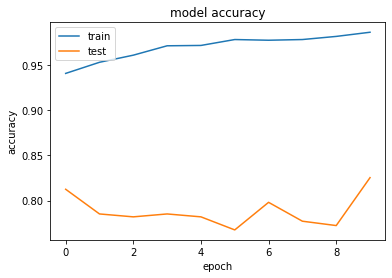

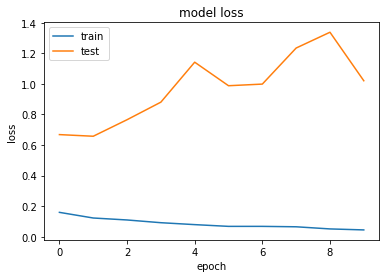

In [100]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
print('Accuracy of train is:',max(history.history['acc']))
print('Accuracy of test is:',max(history.history['val_acc']))

Accuracy of train is: 0.9858129
Accuracy of test is: 0.82532054


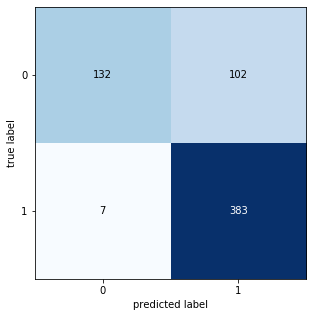

In [101]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test)

CM = confusion_matrix(y_test, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [103]:
print('The sensitivity is:',(383/(383+7)*100) )
print('The specificity is:', (132/(132+102)*100))

The sensitivity is: 98.2051282051282
The specificity is: 56.41025641025641


In [105]:
batch_size = 256
epochs = 15

In [106]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/15
5216/5216 [==============================] - ETA: 3:52 - loss: 0.0317 - acc: 1.000 - ETA: 3:42 - loss: 0.1106 - acc: 0.984 - ETA: 3:58 - loss: 0.1028 - acc: 0.979 - ETA: 4:22 - loss: 0.0825 - acc: 0.984 - ETA: 4:22 - loss: 0.0733 - acc: 0.987 - ETA: 4:12 - loss: 0.0660 - acc: 0.989 - ETA: 4:54 - loss: 0.0621 - acc: 0.991 - ETA: 5:02 - loss: 0.0577 - acc: 0.992 - ETA: 5:20 - loss: 0.0526 - acc: 0.993 - ETA: 5:28 - loss: 0.0520 - acc: 0.990 - ETA: 5:56 - loss: 0.0494 - acc: 0.991 - ETA: 6:06 - loss: 0.0471 - acc: 0.992 - ETA: 6:25 - loss: 0.0459 - acc: 0.992 - ETA: 6:55 - loss: 0.0457 - acc: 0.991 - ETA: 6:48 - loss: 0.0456 - acc: 0.989 - ETA: 6:37 - loss: 0.0444 - acc: 0.990 - ETA: 6:28 - loss: 0.0430 - acc: 0.990 - ETA: 6:23 - loss: 0.0408 - acc: 0.991 - ETA: 6:14 - loss: 0.0391 - acc: 0.991 - ETA: 6:05 - loss: 0.0375 - acc: 0.992 - ETA: 5:57 - loss: 0.0375 - acc: 0.991 - ETA: 5:48 - loss: 0.0393 - acc: 0.990 - ETA: 5:40 - loss:

5216/5216 [==============================] - ETA: 12:52 - loss: 0.0318 - acc: 1.00 - ETA: 11:00 - loss: 0.0272 - acc: 1.00 - ETA: 10:11 - loss: 0.0228 - acc: 1.00 - ETA: 9:40 - loss: 0.0188 - acc: 1.0000 - ETA: 9:26 - loss: 0.0232 - acc: 1.000 - ETA: 9:26 - loss: 0.0261 - acc: 1.000 - ETA: 9:30 - loss: 0.0264 - acc: 1.000 - ETA: 9:43 - loss: 0.0261 - acc: 1.000 - ETA: 9:53 - loss: 0.0244 - acc: 1.000 - ETA: 9:50 - loss: 0.0273 - acc: 0.993 - ETA: 9:26 - loss: 0.0251 - acc: 0.994 - ETA: 8:55 - loss: 0.0260 - acc: 0.994 - ETA: 8:26 - loss: 0.0245 - acc: 0.995 - ETA: 8:08 - loss: 0.0229 - acc: 0.995 - ETA: 7:49 - loss: 0.0217 - acc: 0.995 - ETA: 7:29 - loss: 0.0211 - acc: 0.996 - ETA: 7:11 - loss: 0.0201 - acc: 0.996 - ETA: 6:54 - loss: 0.0199 - acc: 0.996 - ETA: 6:40 - loss: 0.0192 - acc: 0.996 - ETA: 6:26 - loss: 0.0218 - acc: 0.995 - ETA: 6:15 - loss: 0.0226 - acc: 0.995 - ETA: 6:05 - loss: 0.0227 - acc: 0.995 - ETA: 5:59 - loss: 0.0217 - acc: 0.995 - ETA: 5:50 - loss: 0.0211 - acc: 0.

5216/5216 [==============================] - ETA: 6:04 - loss: 0.1163 - acc: 0.937 - ETA: 4:58 - loss: 0.1084 - acc: 0.953 - ETA: 4:33 - loss: 0.0764 - acc: 0.968 - ETA: 4:45 - loss: 0.0636 - acc: 0.976 - ETA: 4:31 - loss: 0.0515 - acc: 0.981 - ETA: 4:35 - loss: 0.0485 - acc: 0.984 - ETA: 4:30 - loss: 0.0489 - acc: 0.982 - ETA: 5:22 - loss: 0.0462 - acc: 0.984 - ETA: 5:56 - loss: 0.0486 - acc: 0.979 - ETA: 6:50 - loss: 0.0462 - acc: 0.981 - ETA: 7:21 - loss: 0.0426 - acc: 0.983 - ETA: 7:45 - loss: 0.0443 - acc: 0.979 - ETA: 7:52 - loss: 0.0447 - acc: 0.978 - ETA: 7:43 - loss: 0.0461 - acc: 0.977 - ETA: 7:43 - loss: 0.0493 - acc: 0.977 - ETA: 7:28 - loss: 0.0503 - acc: 0.976 - ETA: 7:14 - loss: 0.0491 - acc: 0.976 - ETA: 7:00 - loss: 0.0479 - acc: 0.975 - ETA: 6:45 - loss: 0.0462 - acc: 0.977 - ETA: 6:35 - loss: 0.0447 - acc: 0.978 - ETA: 6:25 - loss: 0.0437 - acc: 0.979 - ETA: 6:18 - loss: 0.0433 - acc: 0.980 - ETA: 6:09 - loss: 0.0424 - acc: 0.981 - ETA: 6:02 - loss: 0.0425 - acc: 0.9

5216/5216 [==============================] - ETA: 7:13 - loss: 0.0201 - acc: 1.000 - ETA: 6:24 - loss: 0.0110 - acc: 1.000 - ETA: 5:36 - loss: 0.0298 - acc: 0.989 - ETA: 5:18 - loss: 0.0291 - acc: 0.984 - ETA: 5:18 - loss: 0.0241 - acc: 0.987 - ETA: 5:09 - loss: 0.0279 - acc: 0.989 - ETA: 5:26 - loss: 0.0287 - acc: 0.991 - ETA: 5:42 - loss: 0.0286 - acc: 0.992 - ETA: 6:12 - loss: 0.0269 - acc: 0.993 - ETA: 6:37 - loss: 0.0245 - acc: 0.993 - ETA: 6:42 - loss: 0.0230 - acc: 0.994 - ETA: 7:10 - loss: 0.0213 - acc: 0.994 - ETA: 7:24 - loss: 0.0200 - acc: 0.995 - ETA: 7:23 - loss: 0.0186 - acc: 0.995 - ETA: 7:10 - loss: 0.0177 - acc: 0.995 - ETA: 6:54 - loss: 0.0167 - acc: 0.996 - ETA: 6:42 - loss: 0.0161 - acc: 0.996 - ETA: 6:31 - loss: 0.0173 - acc: 0.996 - ETA: 6:27 - loss: 0.0168 - acc: 0.996 - ETA: 6:19 - loss: 0.0161 - acc: 0.996 - ETA: 6:08 - loss: 0.0207 - acc: 0.995 - ETA: 6:00 - loss: 0.0210 - acc: 0.995 - ETA: 5:54 - loss: 0.0228 - acc: 0.994 - ETA: 5:49 - loss: 0.0264 - acc: 0.9

5216/5216 [==============================] - ETA: 13:14 - loss: 0.0187 - acc: 1.00 - ETA: 14:44 - loss: 0.0114 - acc: 1.00 - ETA: 12:31 - loss: 0.0131 - acc: 1.00 - ETA: 12:15 - loss: 0.0150 - acc: 1.00 - ETA: 11:07 - loss: 0.0356 - acc: 0.98 - ETA: 12:16 - loss: 0.0334 - acc: 0.98 - ETA: 12:39 - loss: 0.0335 - acc: 0.99 - ETA: 12:18 - loss: 0.0303 - acc: 0.99 - ETA: 12:09 - loss: 0.0273 - acc: 0.99 - ETA: 11:49 - loss: 0.0248 - acc: 0.99 - ETA: 11:41 - loss: 0.0242 - acc: 0.99 - ETA: 11:39 - loss: 0.0294 - acc: 0.98 - ETA: 11:24 - loss: 0.0283 - acc: 0.99 - ETA: 11:20 - loss: 0.0302 - acc: 0.98 - ETA: 11:03 - loss: 0.0297 - acc: 0.98 - ETA: 11:06 - loss: 0.0287 - acc: 0.99 - ETA: 10:45 - loss: 0.0274 - acc: 0.99 - ETA: 10:52 - loss: 0.0275 - acc: 0.99 - ETA: 10:57 - loss: 0.0268 - acc: 0.99 - ETA: 10:49 - loss: 0.0256 - acc: 0.99 - ETA: 10:24 - loss: 0.0271 - acc: 0.98 - ETA: 10:04 - loss: 0.0261 - acc: 0.99 - ETA: 9:41 - loss: 0.0254 - acc: 0.9905 - ETA: 9:24 - loss: 0.0251 - acc: 0.

5216/5216 [==============================] - ETA: 4:43 - loss: 0.0547 - acc: 0.968 - ETA: 4:14 - loss: 0.0527 - acc: 0.984 - ETA: 5:10 - loss: 0.0386 - acc: 0.989 - ETA: 6:01 - loss: 0.0301 - acc: 0.992 - ETA: 7:09 - loss: 0.0269 - acc: 0.993 - ETA: 8:03 - loss: 0.0224 - acc: 0.994 - ETA: 8:45 - loss: 0.0214 - acc: 0.995 - ETA: 8:25 - loss: 0.0210 - acc: 0.996 - ETA: 8:23 - loss: 0.0190 - acc: 0.996 - ETA: 7:49 - loss: 0.0214 - acc: 0.996 - ETA: 7:26 - loss: 0.0209 - acc: 0.997 - ETA: 7:03 - loss: 0.0201 - acc: 0.997 - ETA: 6:46 - loss: 0.0200 - acc: 0.997 - ETA: 6:30 - loss: 0.0200 - acc: 0.997 - ETA: 6:19 - loss: 0.0188 - acc: 0.997 - ETA: 7:09 - loss: 0.0218 - acc: 0.996 - ETA: 6:52 - loss: 0.0207 - acc: 0.996 - ETA: 6:37 - loss: 0.0196 - acc: 0.996 - ETA: 6:26 - loss: 0.0187 - acc: 0.996 - ETA: 6:23 - loss: 0.0180 - acc: 0.996 - ETA: 6:11 - loss: 0.0196 - acc: 0.995 - ETA: 6:01 - loss: 0.0198 - acc: 0.995 - ETA: 5:53 - loss: 0.0191 - acc: 0.995 - ETA: 5:45 - loss: 0.0194 - acc: 0.9

5216/5216 [==============================] - ETA: 4:35 - loss: 0.0037 - acc: 1.000 - ETA: 4:10 - loss: 0.0290 - acc: 0.984 - ETA: 3:48 - loss: 0.0221 - acc: 0.989 - ETA: 3:54 - loss: 0.0194 - acc: 0.992 - ETA: 4:01 - loss: 0.0160 - acc: 0.993 - ETA: 4:13 - loss: 0.0328 - acc: 0.989 - ETA: 5:13 - loss: 0.0282 - acc: 0.991 - ETA: 5:08 - loss: 0.0294 - acc: 0.992 - ETA: 6:11 - loss: 0.0272 - acc: 0.993 - ETA: 6:36 - loss: 0.0329 - acc: 0.990 - ETA: 6:54 - loss: 0.0304 - acc: 0.991 - ETA: 7:01 - loss: 0.0284 - acc: 0.992 - ETA: 7:13 - loss: 0.0274 - acc: 0.992 - ETA: 7:05 - loss: 0.0265 - acc: 0.993 - ETA: 6:51 - loss: 0.0247 - acc: 0.993 - ETA: 6:42 - loss: 0.0234 - acc: 0.994 - ETA: 6:34 - loss: 0.0245 - acc: 0.994 - ETA: 6:22 - loss: 0.0245 - acc: 0.994 - ETA: 6:10 - loss: 0.0233 - acc: 0.995 - ETA: 5:59 - loss: 0.0233 - acc: 0.995 - ETA: 5:57 - loss: 0.0232 - acc: 0.995 - ETA: 5:50 - loss: 0.0230 - acc: 0.995 - ETA: 5:41 - loss: 0.0228 - acc: 0.995 - ETA: 5:39 - loss: 0.0219 - acc: 0.9

5216/5216 [==============================] - ETA: 4:25 - loss: 0.0040 - acc: 1.000 - ETA: 11:12 - loss: 0.0030 - acc: 1.00 - ETA: 9:04 - loss: 0.0042 - acc: 1.0000 - ETA: 7:55 - loss: 0.0403 - acc: 0.992 - ETA: 7:07 - loss: 0.0330 - acc: 0.993 - ETA: 8:07 - loss: 0.0275 - acc: 0.994 - ETA: 8:35 - loss: 0.0309 - acc: 0.991 - ETA: 8:35 - loss: 0.0277 - acc: 0.992 - ETA: 8:21 - loss: 0.0260 - acc: 0.993 - ETA: 8:20 - loss: 0.0272 - acc: 0.993 - ETA: 8:48 - loss: 0.0270 - acc: 0.994 - ETA: 8:38 - loss: 0.0251 - acc: 0.994 - ETA: 8:27 - loss: 0.0275 - acc: 0.995 - ETA: 8:07 - loss: 0.0260 - acc: 0.995 - ETA: 7:43 - loss: 0.0250 - acc: 0.995 - ETA: 7:31 - loss: 0.0283 - acc: 0.994 - ETA: 7:29 - loss: 0.0276 - acc: 0.994 - ETA: 7:23 - loss: 0.0262 - acc: 0.994 - ETA: 7:33 - loss: 0.0257 - acc: 0.995 - ETA: 7:22 - loss: 0.0245 - acc: 0.995 - ETA: 7:10 - loss: 0.0274 - acc: 0.992 - ETA: 6:57 - loss: 0.0299 - acc: 0.991 - ETA: 6:47 - loss: 0.0295 - acc: 0.991 - ETA: 6:37 - loss: 0.0294 - acc: 0.

5216/5216 [==============================] - ETA: 3:37 - loss: 0.0051 - acc: 1.000 - ETA: 4:18 - loss: 0.0099 - acc: 1.000 - ETA: 4:20 - loss: 0.0348 - acc: 0.989 - ETA: 4:06 - loss: 0.0268 - acc: 0.992 - ETA: 4:08 - loss: 0.0283 - acc: 0.987 - ETA: 4:17 - loss: 0.0242 - acc: 0.989 - ETA: 4:29 - loss: 0.0211 - acc: 0.991 - ETA: 5:15 - loss: 0.0185 - acc: 0.992 - ETA: 5:35 - loss: 0.0192 - acc: 0.993 - ETA: 5:40 - loss: 0.0205 - acc: 0.990 - ETA: 5:52 - loss: 0.0189 - acc: 0.991 - ETA: 6:06 - loss: 0.0174 - acc: 0.992 - ETA: 6:03 - loss: 0.0187 - acc: 0.990 - ETA: 6:19 - loss: 0.0194 - acc: 0.991 - ETA: 6:30 - loss: 0.0181 - acc: 0.991 - ETA: 6:32 - loss: 0.0179 - acc: 0.992 - ETA: 6:34 - loss: 0.0171 - acc: 0.992 - ETA: 6:24 - loss: 0.0166 - acc: 0.993 - ETA: 6:12 - loss: 0.0157 - acc: 0.993 - ETA: 6:02 - loss: 0.0151 - acc: 0.993 - ETA: 5:55 - loss: 0.0156 - acc: 0.994 - ETA: 5:45 - loss: 0.0152 - acc: 0.994 - ETA: 5:43 - loss: 0.0158 - acc: 0.994 - ETA: 5:36 - loss: 0.0152 - acc: 0.9

5216/5216 [==============================] - ETA: 6:47 - loss: 0.0111 - acc: 1.000 - ETA: 8:21 - loss: 0.0483 - acc: 0.984 - ETA: 9:30 - loss: 0.0325 - acc: 0.989 - ETA: 9:01 - loss: 0.0244 - acc: 0.992 - ETA: 8:39 - loss: 0.0196 - acc: 0.993 - ETA: 8:23 - loss: 0.0180 - acc: 0.994 - ETA: 8:41 - loss: 0.0178 - acc: 0.995 - ETA: 7:58 - loss: 0.0177 - acc: 0.996 - ETA: 7:24 - loss: 0.0186 - acc: 0.993 - ETA: 7:06 - loss: 0.0168 - acc: 0.993 - ETA: 6:48 - loss: 0.0218 - acc: 0.991 - ETA: 6:29 - loss: 0.0240 - acc: 0.989 - ETA: 6:18 - loss: 0.0223 - acc: 0.990 - ETA: 6:13 - loss: 0.0217 - acc: 0.991 - ETA: 6:01 - loss: 0.0205 - acc: 0.991 - ETA: 5:48 - loss: 0.0194 - acc: 0.992 - ETA: 5:36 - loss: 0.0192 - acc: 0.992 - ETA: 5:26 - loss: 0.0191 - acc: 0.993 - ETA: 5:17 - loss: 0.0181 - acc: 0.993 - ETA: 5:10 - loss: 0.0181 - acc: 0.993 - ETA: 5:07 - loss: 0.0180 - acc: 0.994 - ETA: 5:01 - loss: 0.0176 - acc: 0.994 - ETA: 4:58 - loss: 0.0171 - acc: 0.994 - ETA: 4:52 - loss: 0.0165 - acc: 0.9

5216/5216 [==============================] - ETA: 9:29 - loss: 0.0016 - acc: 1.000 - ETA: 9:29 - loss: 0.0167 - acc: 1.000 - ETA: 8:30 - loss: 0.0283 - acc: 0.989 - ETA: 7:35 - loss: 0.0247 - acc: 0.992 - ETA: 6:43 - loss: 0.0280 - acc: 0.987 - ETA: 6:13 - loss: 0.0244 - acc: 0.989 - ETA: 5:59 - loss: 0.0213 - acc: 0.991 - ETA: 5:37 - loss: 0.0188 - acc: 0.992 - ETA: 5:26 - loss: 0.0170 - acc: 0.993 - ETA: 5:21 - loss: 0.0153 - acc: 0.993 - ETA: 5:12 - loss: 0.0140 - acc: 0.994 - ETA: 5:09 - loss: 0.0141 - acc: 0.994 - ETA: 5:00 - loss: 0.0132 - acc: 0.995 - ETA: 4:56 - loss: 0.0123 - acc: 0.995 - ETA: 4:49 - loss: 0.0116 - acc: 0.995 - ETA: 4:45 - loss: 0.0117 - acc: 0.996 - ETA: 4:41 - loss: 0.0111 - acc: 0.996 - ETA: 4:33 - loss: 0.0106 - acc: 0.996 - ETA: 4:30 - loss: 0.0103 - acc: 0.996 - ETA: 4:25 - loss: 0.0103 - acc: 0.996 - ETA: 4:22 - loss: 0.0098 - acc: 0.997 - ETA: 4:19 - loss: 0.0101 - acc: 0.997 - ETA: 4:32 - loss: 0.0110 - acc: 0.997 - ETA: 4:28 - loss: 0.0106 - acc: 0.9

5216/5216 [==============================] - ETA: 4:15 - loss: 0.1095 - acc: 0.968 - ETA: 4:25 - loss: 0.0549 - acc: 0.984 - ETA: 5:50 - loss: 0.0366 - acc: 0.989 - ETA: 6:36 - loss: 0.0366 - acc: 0.984 - ETA: 7:13 - loss: 0.0294 - acc: 0.987 - ETA: 7:13 - loss: 0.0246 - acc: 0.989 - ETA: 7:53 - loss: 0.0217 - acc: 0.991 - ETA: 8:21 - loss: 0.0210 - acc: 0.992 - ETA: 8:42 - loss: 0.0215 - acc: 0.993 - ETA: 8:39 - loss: 0.0196 - acc: 0.993 - ETA: 8:09 - loss: 0.0227 - acc: 0.991 - ETA: 7:44 - loss: 0.0210 - acc: 0.992 - ETA: 7:30 - loss: 0.0195 - acc: 0.992 - ETA: 7:13 - loss: 0.0185 - acc: 0.993 - ETA: 6:55 - loss: 0.0177 - acc: 0.993 - ETA: 6:45 - loss: 0.0176 - acc: 0.994 - ETA: 6:38 - loss: 0.0171 - acc: 0.994 - ETA: 6:26 - loss: 0.0166 - acc: 0.994 - ETA: 6:16 - loss: 0.0199 - acc: 0.993 - ETA: 6:09 - loss: 0.0190 - acc: 0.993 - ETA: 5:58 - loss: 0.0182 - acc: 0.994 - ETA: 5:55 - loss: 0.0174 - acc: 0.994 - ETA: 5:49 - loss: 0.0167 - acc: 0.994 - ETA: 5:42 - loss: 0.0164 - acc: 0.9

5216/5216 [==============================] - ETA: 12:26 - loss: 0.0173 - acc: 1.00 - ETA: 12:59 - loss: 0.0133 - acc: 1.00 - ETA: 16:14 - loss: 0.0092 - acc: 1.00 - ETA: 13:51 - loss: 0.0116 - acc: 1.00 - ETA: 14:38 - loss: 0.0105 - acc: 1.00 - ETA: 13:36 - loss: 0.0090 - acc: 1.00 - ETA: 12:53 - loss: 0.0080 - acc: 1.00 - ETA: 11:49 - loss: 0.0073 - acc: 1.00 - ETA: 10:49 - loss: 0.0074 - acc: 1.00 - ETA: 10:04 - loss: 0.0069 - acc: 1.00 - ETA: 9:31 - loss: 0.0074 - acc: 1.0000 - ETA: 8:57 - loss: 0.0069 - acc: 1.000 - ETA: 8:31 - loss: 0.0093 - acc: 1.000 - ETA: 8:11 - loss: 0.0108 - acc: 1.000 - ETA: 7:47 - loss: 0.0102 - acc: 1.000 - ETA: 7:36 - loss: 0.0096 - acc: 1.000 - ETA: 7:27 - loss: 0.0102 - acc: 1.000 - ETA: 7:11 - loss: 0.0135 - acc: 0.998 - ETA: 7:00 - loss: 0.0130 - acc: 0.998 - ETA: 6:47 - loss: 0.0129 - acc: 0.998 - ETA: 6:36 - loss: 0.0129 - acc: 0.998 - ETA: 6:27 - loss: 0.0123 - acc: 0.998 - ETA: 6:16 - loss: 0.0121 - acc: 0.998 - ETA: 6:06 - loss: 0.0117 - acc: 0.

5216/5216 [==============================] - ETA: 5:21 - loss: 2.1842e-04 - acc: 1.000 - ETA: 4:20 - loss: 5.5025e-04 - acc: 1.000 - ETA: 4:35 - loss: 0.0045 - acc: 1.0000    - ETA: 9:15 - loss: 0.0065 - acc: 1.000 - ETA: 8:30 - loss: 0.0090 - acc: 1.000 - ETA: 8:35 - loss: 0.0099 - acc: 1.000 - ETA: 8:07 - loss: 0.0086 - acc: 1.000 - ETA: 8:30 - loss: 0.0124 - acc: 0.996 - ETA: 8:25 - loss: 0.0110 - acc: 0.996 - ETA: 8:37 - loss: 0.0100 - acc: 0.996 - ETA: 8:37 - loss: 0.0110 - acc: 0.997 - ETA: 8:48 - loss: 0.0146 - acc: 0.994 - ETA: 8:53 - loss: 0.0137 - acc: 0.995 - ETA: 8:33 - loss: 0.0128 - acc: 0.995 - ETA: 8:33 - loss: 0.0121 - acc: 0.995 - ETA: 8:18 - loss: 0.0116 - acc: 0.996 - ETA: 7:58 - loss: 0.0114 - acc: 0.996 - ETA: 7:43 - loss: 0.0118 - acc: 0.996 - ETA: 7:25 - loss: 0.0113 - acc: 0.996 - ETA: 7:14 - loss: 0.0167 - acc: 0.993 - ETA: 6:59 - loss: 0.0160 - acc: 0.994 - ETA: 6:45 - loss: 0.0160 - acc: 0.994 - ETA: 6:35 - loss: 0.0153 - acc: 0.994 - ETA: 6:25 - loss: 0.015

5216/5216 [==============================] - ETA: 7:15 - loss: 0.0015 - acc: 1.000 - ETA: 7:46 - loss: 0.0161 - acc: 0.984 - ETA: 7:24 - loss: 0.0108 - acc: 0.989 - ETA: 8:31 - loss: 0.0081 - acc: 0.992 - ETA: 9:31 - loss: 0.0068 - acc: 0.993 - ETA: 10:19 - loss: 0.0058 - acc: 0.99 - ETA: 10:23 - loss: 0.0106 - acc: 0.99 - ETA: 10:08 - loss: 0.0095 - acc: 0.99 - ETA: 9:37 - loss: 0.0085 - acc: 0.9931 - ETA: 9:14 - loss: 0.0090 - acc: 0.993 - ETA: 9:05 - loss: 0.0094 - acc: 0.994 - ETA: 9:11 - loss: 0.0086 - acc: 0.994 - ETA: 9:00 - loss: 0.0080 - acc: 0.995 - ETA: 8:43 - loss: 0.0084 - acc: 0.995 - ETA: 8:28 - loss: 0.0090 - acc: 0.995 - ETA: 8:14 - loss: 0.0122 - acc: 0.994 - ETA: 8:05 - loss: 0.0116 - acc: 0.994 - ETA: 8:08 - loss: 0.0110 - acc: 0.994 - ETA: 8:02 - loss: 0.0176 - acc: 0.993 - ETA: 7:57 - loss: 0.0168 - acc: 0.993 - ETA: 7:48 - loss: 0.0161 - acc: 0.994 - ETA: 7:39 - loss: 0.0154 - acc: 0.994 - ETA: 7:31 - loss: 0.0148 - acc: 0.994 - ETA: 7:25 - loss: 0.0141 - acc: 0.

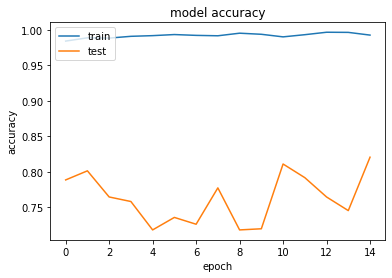

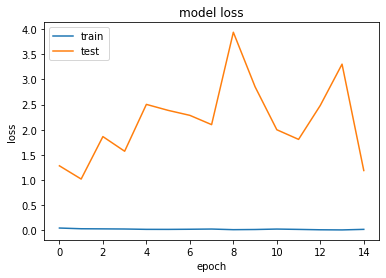

In [108]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
print('Accuracy of train is:',max(history.history['acc']))
print('Accuracy of test is:',max(history.history['val_acc']))

Accuracy of train is: 0.9967408
Accuracy of test is: 0.82051283


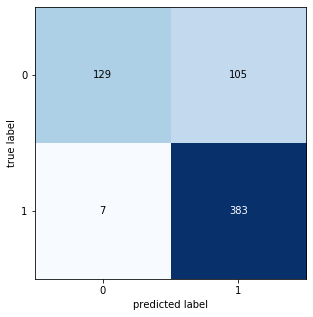

In [109]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test)

CM = confusion_matrix(y_test, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [111]:
print('The sensitivity is:',(383/(383+7)*100) )
print('The specificity is:', (129/(129+105)*100))

The sensitivity is: 98.2051282051282
The specificity is: 55.12820512820513


In [112]:
model = models.Sequential()

#Convolutional layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(layers.Conv2D(16, (3, 3), padding="same", activation='relu'))
#Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 73, 73, 32)        4640      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 73, 73, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 34, 34, 64)       

In [113]:
batch_size = 256
epochs = 10

In [114]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/10
5216/5216 [==============================] - ETA: 22:58 - loss: 0.6777 - acc: 0.62 - ETA: 21:33 - loss: 0.7216 - acc: 0.64 - ETA: 21:11 - loss: 0.6943 - acc: 0.62 - ETA: 20:36 - loss: 0.6847 - acc: 0.63 - ETA: 19:46 - loss: 0.6703 - acc: 0.65 - ETA: 18:05 - loss: 0.6423 - acc: 0.67 - ETA: 16:46 - loss: 0.6551 - acc: 0.66 - ETA: 15:49 - loss: 0.6578 - acc: 0.66 - ETA: 14:56 - loss: 0.6408 - acc: 0.69 - ETA: 14:22 - loss: 0.6420 - acc: 0.69 - ETA: 13:51 - loss: 0.6339 - acc: 0.70 - ETA: 13:35 - loss: 0.6310 - acc: 0.70 - ETA: 13:11 - loss: 0.6233 - acc: 0.71 - ETA: 12:58 - loss: 0.6124 - acc: 0.72 - ETA: 12:36 - loss: 0.6052 - acc: 0.73 - ETA: 12:19 - loss: 0.5972 - acc: 0.73 - ETA: 12:08 - loss: 0.6094 - acc: 0.73 - ETA: 11:55 - loss: 0.6234 - acc: 0.72 - ETA: 11:37 - loss: 0.6210 - acc: 0.73 - ETA: 11:24 - loss: 0.6186 - acc: 0.73 - ETA: 11:10 - loss: 0.6188 - acc: 0.73 - ETA: 11:06 - loss: 0.6188 - acc: 0.74 - ETA: 10:56 - loss

5216/5216 [==============================] - ETA: 12:42 - loss: 0.5904 - acc: 0.75 - ETA: 21:37 - loss: 0.6159 - acc: 0.71 - ETA: 17:51 - loss: 0.5914 - acc: 0.75 - ETA: 16:06 - loss: 0.6010 - acc: 0.73 - ETA: 14:53 - loss: 0.5918 - acc: 0.75 - ETA: 14:00 - loss: 0.5960 - acc: 0.74 - ETA: 13:18 - loss: 0.5953 - acc: 0.74 - ETA: 12:35 - loss: 0.6121 - acc: 0.72 - ETA: 12:08 - loss: 0.6015 - acc: 0.73 - ETA: 11:43 - loss: 0.6010 - acc: 0.74 - ETA: 11:23 - loss: 0.6003 - acc: 0.73 - ETA: 11:04 - loss: 0.6097 - acc: 0.72 - ETA: 10:48 - loss: 0.6071 - acc: 0.72 - ETA: 10:35 - loss: 0.6021 - acc: 0.73 - ETA: 10:26 - loss: 0.6010 - acc: 0.73 - ETA: 10:18 - loss: 0.6013 - acc: 0.73 - ETA: 10:09 - loss: 0.5986 - acc: 0.73 - ETA: 10:04 - loss: 0.6001 - acc: 0.72 - ETA: 9:58 - loss: 0.5977 - acc: 0.7303 - ETA: 9:55 - loss: 0.5895 - acc: 0.737 - ETA: 9:46 - loss: 0.5995 - acc: 0.732 - ETA: 9:38 - loss: 0.6015 - acc: 0.731 - ETA: 9:35 - loss: 0.6000 - acc: 0.733 - ETA: 9:27 - loss: 0.5998 - acc: 0.

5216/5216 [==============================] - ETA: 9:24 - loss: 0.3869 - acc: 0.875 - ETA: 8:54 - loss: 0.4732 - acc: 0.812 - ETA: 9:57 - loss: 0.5719 - acc: 0.718 - ETA: 11:02 - loss: 0.5777 - acc: 0.71 - ETA: 11:29 - loss: 0.5777 - acc: 0.71 - ETA: 12:06 - loss: 0.5519 - acc: 0.74 - ETA: 12:28 - loss: 0.5636 - acc: 0.73 - ETA: 13:12 - loss: 0.5614 - acc: 0.74 - ETA: 13:34 - loss: 0.5666 - acc: 0.73 - ETA: 12:59 - loss: 0.5602 - acc: 0.74 - ETA: 12:33 - loss: 0.5538 - acc: 0.74 - ETA: 12:17 - loss: 0.5500 - acc: 0.74 - ETA: 11:56 - loss: 0.5409 - acc: 0.75 - ETA: 11:38 - loss: 0.5470 - acc: 0.75 - ETA: 11:27 - loss: 0.5470 - acc: 0.74 - ETA: 11:12 - loss: 0.5451 - acc: 0.75 - ETA: 10:58 - loss: 0.5473 - acc: 0.74 - ETA: 10:46 - loss: 0.5428 - acc: 0.75 - ETA: 10:34 - loss: 0.5459 - acc: 0.75 - ETA: 10:24 - loss: 0.5439 - acc: 0.75 - ETA: 10:15 - loss: 0.5422 - acc: 0.75 - ETA: 10:05 - loss: 0.5405 - acc: 0.74 - ETA: 9:54 - loss: 0.5454 - acc: 0.7418 - ETA: 9:44 - loss: 0.5475 - acc: 0.

5216/5216 [==============================] - ETA: 9:58 - loss: 0.2964 - acc: 0.875 - ETA: 12:11 - loss: 0.2865 - acc: 0.89 - ETA: 12:35 - loss: 0.3567 - acc: 0.84 - ETA: 13:20 - loss: 0.3398 - acc: 0.86 - ETA: 14:17 - loss: 0.3132 - acc: 0.89 - ETA: 13:48 - loss: 0.3490 - acc: 0.86 - ETA: 13:09 - loss: 0.3320 - acc: 0.87 - ETA: 12:38 - loss: 0.3182 - acc: 0.87 - ETA: 12:26 - loss: 0.2998 - acc: 0.87 - ETA: 12:00 - loss: 0.2867 - acc: 0.88 - ETA: 11:42 - loss: 0.2849 - acc: 0.88 - ETA: 11:26 - loss: 0.2788 - acc: 0.89 - ETA: 11:07 - loss: 0.2780 - acc: 0.88 - ETA: 10:52 - loss: 0.2666 - acc: 0.89 - ETA: 10:45 - loss: 0.2651 - acc: 0.89 - ETA: 10:31 - loss: 0.2554 - acc: 0.89 - ETA: 10:23 - loss: 0.2518 - acc: 0.89 - ETA: 10:15 - loss: 0.2469 - acc: 0.89 - ETA: 10:08 - loss: 0.2410 - acc: 0.90 - ETA: 9:57 - loss: 0.2393 - acc: 0.9031 - ETA: 9:51 - loss: 0.2371 - acc: 0.906 - ETA: 9:45 - loss: 0.2294 - acc: 0.909 - ETA: 9:38 - loss: 0.2245 - acc: 0.910 - ETA: 9:33 - loss: 0.2192 - acc: 0.

5216/5216 [==============================] - ETA: 10:43 - loss: 0.0408 - acc: 1.00 - ETA: 10:22 - loss: 0.0557 - acc: 0.98 - ETA: 10:14 - loss: 0.0547 - acc: 0.97 - ETA: 10:03 - loss: 0.0882 - acc: 0.97 - ETA: 11:20 - loss: 0.1241 - acc: 0.97 - ETA: 11:59 - loss: 0.1221 - acc: 0.96 - ETA: 12:41 - loss: 0.1413 - acc: 0.95 - ETA: 13:14 - loss: 0.1382 - acc: 0.95 - ETA: 12:45 - loss: 0.1305 - acc: 0.95 - ETA: 12:16 - loss: 0.1324 - acc: 0.95 - ETA: 12:00 - loss: 0.1452 - acc: 0.94 - ETA: 11:40 - loss: 0.1445 - acc: 0.94 - ETA: 11:20 - loss: 0.1358 - acc: 0.94 - ETA: 11:03 - loss: 0.1278 - acc: 0.95 - ETA: 10:47 - loss: 0.1225 - acc: 0.95 - ETA: 10:36 - loss: 0.1186 - acc: 0.95 - ETA: 10:22 - loss: 0.1184 - acc: 0.95 - ETA: 10:13 - loss: 0.1159 - acc: 0.95 - ETA: 10:02 - loss: 0.1172 - acc: 0.95 - ETA: 9:55 - loss: 0.1149 - acc: 0.9563 - ETA: 9:44 - loss: 0.1207 - acc: 0.952 - ETA: 9:36 - loss: 0.1227 - acc: 0.951 - ETA: 9:30 - loss: 0.1200 - acc: 0.953 - ETA: 9:24 - loss: 0.1171 - acc: 0.

5216/5216 [==============================] - ETA: 9:16 - loss: 0.0883 - acc: 0.968 - ETA: 21:50 - loss: 0.1418 - acc: 0.95 - ETA: 19:49 - loss: 0.1134 - acc: 0.96 - ETA: 18:19 - loss: 0.1277 - acc: 0.94 - ETA: 17:27 - loss: 0.1149 - acc: 0.95 - ETA: 16:58 - loss: 0.1120 - acc: 0.95 - ETA: 15:56 - loss: 0.1041 - acc: 0.95 - ETA: 15:03 - loss: 0.1031 - acc: 0.95 - ETA: 14:19 - loss: 0.1062 - acc: 0.95 - ETA: 13:38 - loss: 0.1005 - acc: 0.95 - ETA: 13:18 - loss: 0.1142 - acc: 0.94 - ETA: 12:56 - loss: 0.1144 - acc: 0.95 - ETA: 12:30 - loss: 0.1106 - acc: 0.95 - ETA: 12:07 - loss: 0.1046 - acc: 0.95 - ETA: 11:50 - loss: 0.1056 - acc: 0.95 - ETA: 11:33 - loss: 0.0997 - acc: 0.95 - ETA: 11:16 - loss: 0.1127 - acc: 0.95 - ETA: 11:01 - loss: 0.1317 - acc: 0.95 - ETA: 10:49 - loss: 0.1280 - acc: 0.95 - ETA: 10:38 - loss: 0.1283 - acc: 0.95 - ETA: 10:30 - loss: 0.1315 - acc: 0.95 - ETA: 10:19 - loss: 0.1293 - acc: 0.95 - ETA: 10:10 - loss: 0.1266 - acc: 0.95 - ETA: 10:08 - loss: 0.1252 - acc: 0.

5216/5216 [==============================] - ETA: 9:47 - loss: 0.0301 - acc: 1.000 - ETA: 12:01 - loss: 0.0411 - acc: 0.98 - ETA: 12:56 - loss: 0.0660 - acc: 0.96 - ETA: 13:47 - loss: 0.0681 - acc: 0.96 - ETA: 13:31 - loss: 0.0735 - acc: 0.96 - ETA: 13:54 - loss: 0.0753 - acc: 0.96 - ETA: 13:12 - loss: 0.0765 - acc: 0.96 - ETA: 12:37 - loss: 0.0790 - acc: 0.96 - ETA: 12:23 - loss: 0.0749 - acc: 0.96 - ETA: 12:00 - loss: 0.0803 - acc: 0.96 - ETA: 11:37 - loss: 0.1035 - acc: 0.96 - ETA: 11:16 - loss: 0.1029 - acc: 0.96 - ETA: 11:01 - loss: 0.0995 - acc: 0.96 - ETA: 10:51 - loss: 0.0991 - acc: 0.96 - ETA: 10:43 - loss: 0.0971 - acc: 0.96 - ETA: 10:32 - loss: 0.0964 - acc: 0.96 - ETA: 10:21 - loss: 0.0939 - acc: 0.96 - ETA: 10:10 - loss: 0.1010 - acc: 0.96 - ETA: 10:00 - loss: 0.1094 - acc: 0.96 - ETA: 10:07 - loss: 0.1107 - acc: 0.95 - ETA: 10:38 - loss: 0.1074 - acc: 0.96 - ETA: 10:31 - loss: 0.1048 - acc: 0.96 - ETA: 10:28 - loss: 0.1071 - acc: 0.96 - ETA: 10:21 - loss: 0.1046 - acc: 0.

5216/5216 [==============================] - ETA: 11:05 - loss: 0.0920 - acc: 0.93 - ETA: 15:09 - loss: 0.1281 - acc: 0.93 - ETA: 17:41 - loss: 0.0985 - acc: 0.95 - ETA: 16:43 - loss: 0.1119 - acc: 0.95 - ETA: 15:56 - loss: 0.0976 - acc: 0.96 - ETA: 15:33 - loss: 0.0894 - acc: 0.96 - ETA: 14:43 - loss: 0.0928 - acc: 0.96 - ETA: 14:00 - loss: 0.0947 - acc: 0.96 - ETA: 13:17 - loss: 0.0890 - acc: 0.96 - ETA: 12:48 - loss: 0.0946 - acc: 0.96 - ETA: 12:28 - loss: 0.1139 - acc: 0.95 - ETA: 12:12 - loss: 0.1126 - acc: 0.95 - ETA: 11:48 - loss: 0.1084 - acc: 0.95 - ETA: 11:29 - loss: 0.1072 - acc: 0.95 - ETA: 11:13 - loss: 0.1074 - acc: 0.95 - ETA: 11:08 - loss: 0.1195 - acc: 0.95 - ETA: 10:53 - loss: 0.1144 - acc: 0.95 - ETA: 10:39 - loss: 0.1147 - acc: 0.95 - ETA: 10:30 - loss: 0.1131 - acc: 0.95 - ETA: 10:21 - loss: 0.1083 - acc: 0.95 - ETA: 10:16 - loss: 0.1045 - acc: 0.95 - ETA: 10:06 - loss: 0.1009 - acc: 0.96 - ETA: 9:57 - loss: 0.1046 - acc: 0.9606 - ETA: 9:47 - loss: 0.1052 - acc: 0.

5216/5216 [==============================] - ETA: 9:11 - loss: 0.0843 - acc: 0.968 - ETA: 16:37 - loss: 0.2308 - acc: 0.95 - ETA: 18:02 - loss: 0.1911 - acc: 0.95 - ETA: 19:09 - loss: 0.1459 - acc: 0.96 - ETA: 19:02 - loss: 0.1194 - acc: 0.97 - ETA: 17:26 - loss: 0.1242 - acc: 0.96 - ETA: 16:16 - loss: 0.1134 - acc: 0.96 - ETA: 15:13 - loss: 0.1119 - acc: 0.96 - ETA: 14:31 - loss: 0.1085 - acc: 0.96 - ETA: 13:55 - loss: 0.1028 - acc: 0.96 - ETA: 13:28 - loss: 0.1018 - acc: 0.96 - ETA: 12:57 - loss: 0.0991 - acc: 0.96 - ETA: 12:34 - loss: 0.0969 - acc: 0.96 - ETA: 12:17 - loss: 0.0913 - acc: 0.96 - ETA: 11:55 - loss: 0.0884 - acc: 0.96 - ETA: 11:40 - loss: 0.0861 - acc: 0.97 - ETA: 11:25 - loss: 0.0823 - acc: 0.97 - ETA: 11:13 - loss: 0.0792 - acc: 0.97 - ETA: 11:04 - loss: 0.0860 - acc: 0.97 - ETA: 10:49 - loss: 0.0858 - acc: 0.97 - ETA: 10:37 - loss: 0.0848 - acc: 0.97 - ETA: 10:28 - loss: 0.0846 - acc: 0.97 - ETA: 10:17 - loss: 0.0829 - acc: 0.97 - ETA: 10:06 - loss: 0.0819 - acc: 0.

5216/5216 [==============================] - ETA: 10:12 - loss: 0.1444 - acc: 0.96 - ETA: 9:46 - loss: 0.1133 - acc: 0.9531 - ETA: 9:18 - loss: 0.1061 - acc: 0.968 - ETA: 9:01 - loss: 0.1014 - acc: 0.968 - ETA: 10:38 - loss: 0.1036 - acc: 0.96 - ETA: 10:55 - loss: 0.0961 - acc: 0.96 - ETA: 12:29 - loss: 0.0867 - acc: 0.97 - ETA: 12:23 - loss: 0.0773 - acc: 0.97 - ETA: 11:49 - loss: 0.0726 - acc: 0.97 - ETA: 11:23 - loss: 0.0694 - acc: 0.98 - ETA: 11:05 - loss: 0.0748 - acc: 0.97 - ETA: 11:11 - loss: 0.0731 - acc: 0.97 - ETA: 10:57 - loss: 0.0807 - acc: 0.97 - ETA: 10:42 - loss: 0.0842 - acc: 0.97 - ETA: 10:30 - loss: 0.0846 - acc: 0.97 - ETA: 10:26 - loss: 0.0877 - acc: 0.97 - ETA: 10:13 - loss: 0.0873 - acc: 0.97 - ETA: 10:03 - loss: 0.0829 - acc: 0.97 - ETA: 9:57 - loss: 0.0807 - acc: 0.9786 - ETA: 9:55 - loss: 0.0792 - acc: 0.978 - ETA: 9:47 - loss: 0.0776 - acc: 0.979 - ETA: 9:43 - loss: 0.0805 - acc: 0.977 - ETA: 9:40 - loss: 0.0823 - acc: 0.974 - ETA: 9:31 - loss: 0.0791 - acc: 0

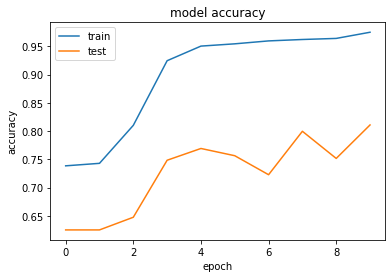

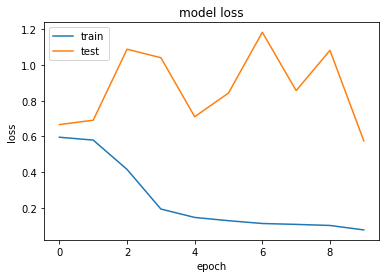

In [115]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [116]:
print('Accuracy of train is:',max(history.history['acc']))
print('Accuracy of test is:',max(history.history['val_acc']))

Accuracy of train is: 0.9750767
Accuracy of test is: 0.8108974


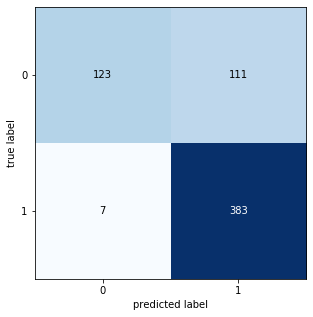

In [117]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
#y_true = np.argmax(y_test,axis = 1)

CM = confusion_matrix(y_test, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [118]:
print('The sensitivity is:',(383/(383+7)*100))
print('The specificity is:', (123/(123+111)*100))

The sensitivity is: 98.2051282051282
The specificity is: 52.56410256410257


In [119]:
batch_size = 256
epochs = 15

In [120]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,
          epochs=epochs)

Train on 5216 samples, validate on 624 samples
Epoch 1/15
5216/5216 [==============================] - ETA: 10:25 - loss: 0.0671 - acc: 0.96 - ETA: 11:16 - loss: 0.1198 - acc: 0.96 - ETA: 11:00 - loss: 0.0978 - acc: 0.97 - ETA: 13:00 - loss: 0.0952 - acc: 0.96 - ETA: 14:08 - loss: 0.0816 - acc: 0.97 - ETA: 15:05 - loss: 0.0723 - acc: 0.97 - ETA: 15:19 - loss: 0.0761 - acc: 0.97 - ETA: 14:47 - loss: 0.0780 - acc: 0.97 - ETA: 14:06 - loss: 0.0759 - acc: 0.97 - ETA: 13:35 - loss: 0.0693 - acc: 0.97 - ETA: 13:13 - loss: 0.0690 - acc: 0.97 - ETA: 12:45 - loss: 0.0651 - acc: 0.97 - ETA: 12:35 - loss: 0.0693 - acc: 0.97 - ETA: 12:20 - loss: 0.0664 - acc: 0.97 - ETA: 12:04 - loss: 0.0629 - acc: 0.97 - ETA: 11:43 - loss: 0.0638 - acc: 0.97 - ETA: 11:30 - loss: 0.0629 - acc: 0.97 - ETA: 11:16 - loss: 0.0624 - acc: 0.97 - ETA: 11:05 - loss: 0.0620 - acc: 0.97 - ETA: 10:51 - loss: 0.0599 - acc: 0.97 - ETA: 10:43 - loss: 0.0580 - acc: 0.97 - ETA: 10:32 - loss: 0.0560 - acc: 0.98 - ETA: 10:22 - loss

5216/5216 [==============================] - ETA: 10:25 - loss: 0.0507 - acc: 0.96 - ETA: 9:53 - loss: 0.0751 - acc: 0.9531 - ETA: 10:36 - loss: 0.0727 - acc: 0.96 - ETA: 12:28 - loss: 0.0733 - acc: 0.96 - ETA: 12:59 - loss: 0.0682 - acc: 0.97 - ETA: 13:31 - loss: 0.0690 - acc: 0.97 - ETA: 14:16 - loss: 0.0644 - acc: 0.97 - ETA: 14:35 - loss: 0.0595 - acc: 0.98 - ETA: 14:32 - loss: 0.0553 - acc: 0.98 - ETA: 13:57 - loss: 0.0551 - acc: 0.98 - ETA: 13:26 - loss: 0.0687 - acc: 0.98 - ETA: 12:56 - loss: 0.0644 - acc: 0.98 - ETA: 12:35 - loss: 0.0609 - acc: 0.98 - ETA: 12:20 - loss: 0.0620 - acc: 0.98 - ETA: 11:59 - loss: 0.0604 - acc: 0.98 - ETA: 11:41 - loss: 0.0621 - acc: 0.98 - ETA: 11:34 - loss: 0.0644 - acc: 0.97 - ETA: 11:24 - loss: 0.0671 - acc: 0.97 - ETA: 11:13 - loss: 0.0666 - acc: 0.97 - ETA: 11:04 - loss: 0.0704 - acc: 0.97 - ETA: 10:54 - loss: 0.0692 - acc: 0.97 - ETA: 10:46 - loss: 0.0739 - acc: 0.97 - ETA: 10:35 - loss: 0.0757 - acc: 0.97 - ETA: 10:23 - loss: 0.0736 - acc: 0

5216/5216 [==============================] - ETA: 10:40 - loss: 0.1071 - acc: 0.96 - ETA: 13:00 - loss: 0.0586 - acc: 0.98 - ETA: 12:01 - loss: 0.0465 - acc: 0.98 - ETA: 12:55 - loss: 0.0519 - acc: 0.97 - ETA: 12:57 - loss: 0.0491 - acc: 0.97 - ETA: 13:03 - loss: 0.0525 - acc: 0.97 - ETA: 13:08 - loss: 0.0533 - acc: 0.96 - ETA: 12:39 - loss: 0.0514 - acc: 0.96 - ETA: 12:20 - loss: 0.0556 - acc: 0.96 - ETA: 11:58 - loss: 0.0522 - acc: 0.96 - ETA: 11:42 - loss: 0.0630 - acc: 0.96 - ETA: 11:20 - loss: 0.0616 - acc: 0.96 - ETA: 11:04 - loss: 0.0645 - acc: 0.96 - ETA: 10:53 - loss: 0.0696 - acc: 0.96 - ETA: 10:40 - loss: 0.0702 - acc: 0.96 - ETA: 10:30 - loss: 0.0683 - acc: 0.96 - ETA: 10:25 - loss: 0.0671 - acc: 0.96 - ETA: 10:38 - loss: 0.0652 - acc: 0.96 - ETA: 10:40 - loss: 0.0638 - acc: 0.96 - ETA: 10:37 - loss: 0.0661 - acc: 0.96 - ETA: 10:27 - loss: 0.0645 - acc: 0.96 - ETA: 10:18 - loss: 0.0634 - acc: 0.96 - ETA: 10:10 - loss: 0.0620 - acc: 0.97 - ETA: 9:59 - loss: 0.0619 - acc: 0.9

5216/5216 [==============================] - ETA: 10:11 - loss: 0.0423 - acc: 0.96 - ETA: 12:25 - loss: 0.0432 - acc: 0.96 - ETA: 14:35 - loss: 0.0566 - acc: 0.96 - ETA: 15:36 - loss: 0.0647 - acc: 0.96 - ETA: 16:28 - loss: 0.0689 - acc: 0.96 - ETA: 16:08 - loss: 0.0598 - acc: 0.97 - ETA: 14:54 - loss: 0.0547 - acc: 0.97 - ETA: 14:10 - loss: 0.0527 - acc: 0.97 - ETA: 13:32 - loss: 0.0479 - acc: 0.97 - ETA: 13:01 - loss: 0.0491 - acc: 0.97 - ETA: 12:31 - loss: 0.0473 - acc: 0.97 - ETA: 12:10 - loss: 0.0462 - acc: 0.97 - ETA: 11:52 - loss: 0.0430 - acc: 0.98 - ETA: 11:39 - loss: 0.0403 - acc: 0.98 - ETA: 11:21 - loss: 0.0468 - acc: 0.97 - ETA: 11:06 - loss: 0.0492 - acc: 0.97 - ETA: 10:56 - loss: 0.0472 - acc: 0.97 - ETA: 10:45 - loss: 0.0501 - acc: 0.97 - ETA: 10:33 - loss: 0.0536 - acc: 0.97 - ETA: 10:30 - loss: 0.0539 - acc: 0.97 - ETA: 10:25 - loss: 0.0516 - acc: 0.97 - ETA: 10:22 - loss: 0.0560 - acc: 0.97 - ETA: 10:11 - loss: 0.0563 - acc: 0.97 - ETA: 10:02 - loss: 0.0579 - acc: 0.

5216/5216 [==============================] - ETA: 9:39 - loss: 0.0182 - acc: 1.000 - ETA: 11:40 - loss: 0.0237 - acc: 1.00 - ETA: 13:07 - loss: 0.0267 - acc: 1.00 - ETA: 13:37 - loss: 0.0380 - acc: 0.99 - ETA: 13:18 - loss: 0.0349 - acc: 0.99 - ETA: 12:58 - loss: 0.0360 - acc: 0.98 - ETA: 12:23 - loss: 0.0310 - acc: 0.99 - ETA: 11:52 - loss: 0.0299 - acc: 0.99 - ETA: 11:24 - loss: 0.0410 - acc: 0.98 - ETA: 11:02 - loss: 0.0404 - acc: 0.99 - ETA: 10:53 - loss: 0.0421 - acc: 0.98 - ETA: 10:39 - loss: 0.0397 - acc: 0.98 - ETA: 10:26 - loss: 0.0404 - acc: 0.98 - ETA: 10:16 - loss: 0.0381 - acc: 0.98 - ETA: 10:04 - loss: 0.0388 - acc: 0.98 - ETA: 9:53 - loss: 0.0403 - acc: 0.9863 - ETA: 9:43 - loss: 0.0396 - acc: 0.987 - ETA: 9:41 - loss: 0.0375 - acc: 0.987 - ETA: 9:33 - loss: 0.0357 - acc: 0.988 - ETA: 9:29 - loss: 0.0370 - acc: 0.987 - ETA: 9:24 - loss: 0.0360 - acc: 0.988 - ETA: 9:18 - loss: 0.0352 - acc: 0.988 - ETA: 9:11 - loss: 0.0399 - acc: 0.986 - ETA: 9:02 - loss: 0.0388 - acc: 0.

5216/5216 [==============================] - ETA: 10:30 - loss: 0.0243 - acc: 1.00 - ETA: 10:00 - loss: 0.0130 - acc: 1.00 - ETA: 9:30 - loss: 0.0321 - acc: 0.9896 - ETA: 11:38 - loss: 0.0405 - acc: 0.98 - ETA: 12:52 - loss: 0.0324 - acc: 0.98 - ETA: 13:01 - loss: 0.0270 - acc: 0.98 - ETA: 12:58 - loss: 0.0316 - acc: 0.98 - ETA: 13:02 - loss: 0.0284 - acc: 0.98 - ETA: 12:29 - loss: 0.0278 - acc: 0.98 - ETA: 12:03 - loss: 0.0256 - acc: 0.99 - ETA: 11:44 - loss: 0.0240 - acc: 0.99 - ETA: 11:23 - loss: 0.0227 - acc: 0.99 - ETA: 11:12 - loss: 0.0245 - acc: 0.99 - ETA: 10:56 - loss: 0.0227 - acc: 0.99 - ETA: 10:42 - loss: 0.0317 - acc: 0.98 - ETA: 10:27 - loss: 0.0300 - acc: 0.99 - ETA: 10:15 - loss: 0.0286 - acc: 0.99 - ETA: 10:10 - loss: 0.0313 - acc: 0.98 - ETA: 9:59 - loss: 0.0316 - acc: 0.9868 - ETA: 9:51 - loss: 0.0306 - acc: 0.987 - ETA: 9:43 - loss: 0.0294 - acc: 0.988 - ETA: 9:36 - loss: 0.0285 - acc: 0.988 - ETA: 9:33 - loss: 0.0275 - acc: 0.989 - ETA: 9:28 - loss: 0.0264 - acc: 0

5216/5216 [==============================] - ETA: 8:54 - loss: 0.0685 - acc: 0.968 - ETA: 9:35 - loss: 0.0655 - acc: 0.968 - ETA: 9:39 - loss: 0.0527 - acc: 0.979 - ETA: 9:48 - loss: 0.0543 - acc: 0.976 - ETA: 10:13 - loss: 0.0484 - acc: 0.98 - ETA: 10:51 - loss: 0.0478 - acc: 0.97 - ETA: 11:30 - loss: 0.0426 - acc: 0.98 - ETA: 12:17 - loss: 0.0411 - acc: 0.98 - ETA: 13:03 - loss: 0.0518 - acc: 0.98 - ETA: 12:31 - loss: 0.0504 - acc: 0.98 - ETA: 12:04 - loss: 0.0459 - acc: 0.98 - ETA: 11:43 - loss: 0.0434 - acc: 0.98 - ETA: 11:29 - loss: 0.0411 - acc: 0.98 - ETA: 11:16 - loss: 0.0400 - acc: 0.98 - ETA: 11:01 - loss: 0.0376 - acc: 0.98 - ETA: 10:45 - loss: 0.0356 - acc: 0.99 - ETA: 10:31 - loss: 0.0339 - acc: 0.99 - ETA: 10:17 - loss: 0.0320 - acc: 0.99 - ETA: 10:08 - loss: 0.0305 - acc: 0.99 - ETA: 10:04 - loss: 0.0305 - acc: 0.99 - ETA: 9:59 - loss: 0.0293 - acc: 0.9911 - ETA: 9:49 - loss: 0.0318 - acc: 0.990 - ETA: 9:43 - loss: 0.0326 - acc: 0.989 - ETA: 9:36 - loss: 0.0322 - acc: 0.

5216/5216 [==============================] - ETA: 9:06 - loss: 1.0273e-05 - acc: 1.000 - ETA: 8:41 - loss: 0.0558 - acc: 0.9844    - ETA: 11:19 - loss: 0.0392 - acc: 0.98 - ETA: 11:03 - loss: 0.0483 - acc: 0.98 - ETA: 11:12 - loss: 0.0386 - acc: 0.98 - ETA: 11:21 - loss: 0.0362 - acc: 0.98 - ETA: 11:32 - loss: 0.0361 - acc: 0.98 - ETA: 12:26 - loss: 0.0321 - acc: 0.98 - ETA: 11:54 - loss: 0.0287 - acc: 0.98 - ETA: 11:27 - loss: 0.0268 - acc: 0.98 - ETA: 11:33 - loss: 0.0256 - acc: 0.98 - ETA: 11:17 - loss: 0.0237 - acc: 0.98 - ETA: 11:01 - loss: 0.0338 - acc: 0.98 - ETA: 10:46 - loss: 0.0371 - acc: 0.98 - ETA: 10:47 - loss: 0.0368 - acc: 0.98 - ETA: 10:32 - loss: 0.0396 - acc: 0.98 - ETA: 10:29 - loss: 0.0386 - acc: 0.98 - ETA: 10:17 - loss: 0.0365 - acc: 0.98 - ETA: 10:07 - loss: 0.0362 - acc: 0.98 - ETA: 9:58 - loss: 0.0348 - acc: 0.9859 - ETA: 9:49 - loss: 0.0374 - acc: 0.983 - ETA: 9:39 - loss: 0.0360 - acc: 0.984 - ETA: 9:31 - loss: 0.0377 - acc: 0.982 - ETA: 9:23 - loss: 0.0363 -

5216/5216 [==============================] - ETA: 10:20 - loss: 0.0102 - acc: 1.00 - ETA: 10:37 - loss: 0.0151 - acc: 1.00 - ETA: 9:58 - loss: 0.0137 - acc: 1.0000 - ETA: 10:44 - loss: 0.0125 - acc: 1.00 - ETA: 12:02 - loss: 0.0103 - acc: 1.00 - ETA: 12:37 - loss: 0.0086 - acc: 1.00 - ETA: 12:42 - loss: 0.0092 - acc: 1.00 - ETA: 12:41 - loss: 0.0092 - acc: 1.00 - ETA: 12:18 - loss: 0.0099 - acc: 1.00 - ETA: 11:56 - loss: 0.0092 - acc: 1.00 - ETA: 11:40 - loss: 0.0108 - acc: 0.99 - ETA: 11:19 - loss: 0.0128 - acc: 0.99 - ETA: 11:12 - loss: 0.0151 - acc: 0.99 - ETA: 11:03 - loss: 0.0152 - acc: 0.99 - ETA: 10:46 - loss: 0.0142 - acc: 0.99 - ETA: 10:35 - loss: 0.0158 - acc: 0.99 - ETA: 10:26 - loss: 0.0149 - acc: 0.99 - ETA: 10:18 - loss: 0.0141 - acc: 0.99 - ETA: 10:08 - loss: 0.0138 - acc: 0.99 - ETA: 9:59 - loss: 0.0131 - acc: 0.9937 - ETA: 9:52 - loss: 0.0128 - acc: 0.994 - ETA: 9:48 - loss: 0.0127 - acc: 0.994 - ETA: 9:38 - loss: 0.0137 - acc: 0.993 - ETA: 9:31 - loss: 0.0131 - acc: 0

5216/5216 [==============================] - ETA: 9:42 - loss: 0.0455 - acc: 0.968 - ETA: 12:19 - loss: 0.0459 - acc: 0.96 - ETA: 11:40 - loss: 0.0310 - acc: 0.97 - ETA: 11:00 - loss: 0.0345 - acc: 0.97 - ETA: 10:28 - loss: 0.0279 - acc: 0.98 - ETA: 10:26 - loss: 0.0283 - acc: 0.97 - ETA: 10:19 - loss: 0.0406 - acc: 0.97 - ETA: 10:03 - loss: 0.0374 - acc: 0.98 - ETA: 9:55 - loss: 0.0335 - acc: 0.9826 - ETA: 9:48 - loss: 0.0520 - acc: 0.978 - ETA: 9:48 - loss: 0.0508 - acc: 0.977 - ETA: 9:39 - loss: 0.0481 - acc: 0.979 - ETA: 9:28 - loss: 0.0444 - acc: 0.980 - ETA: 9:21 - loss: 0.0489 - acc: 0.979 - ETA: 9:12 - loss: 0.0490 - acc: 0.979 - ETA: 9:14 - loss: 0.0467 - acc: 0.980 - ETA: 9:10 - loss: 0.0440 - acc: 0.981 - ETA: 9:08 - loss: 0.0423 - acc: 0.982 - ETA: 9:04 - loss: 0.0402 - acc: 0.983 - ETA: 9:01 - loss: 0.0383 - acc: 0.984 - ETA: 8:56 - loss: 0.0367 - acc: 0.985 - ETA: 8:51 - loss: 0.0359 - acc: 0.985 - ETA: 8:48 - loss: 0.0371 - acc: 0.985 - ETA: 8:46 - loss: 0.0367 - acc: 0.

5216/5216 [==============================] - ETA: 11:42 - loss: 0.0021 - acc: 1.00 - ETA: 14:40 - loss: 0.0027 - acc: 1.00 - ETA: 13:59 - loss: 0.0019 - acc: 1.00 - ETA: 13:17 - loss: 0.0027 - acc: 1.00 - ETA: 12:28 - loss: 0.0025 - acc: 1.00 - ETA: 13:18 - loss: 0.0024 - acc: 1.00 - ETA: 14:08 - loss: 0.0198 - acc: 0.99 - ETA: 14:08 - loss: 0.0176 - acc: 0.99 - ETA: 13:58 - loss: 0.0174 - acc: 0.99 - ETA: 14:08 - loss: 0.0157 - acc: 0.99 - ETA: 14:03 - loss: 0.0364 - acc: 0.98 - ETA: 13:59 - loss: 0.0335 - acc: 0.98 - ETA: 13:43 - loss: 0.0422 - acc: 0.98 - ETA: 13:23 - loss: 0.0396 - acc: 0.98 - ETA: 13:07 - loss: 0.0382 - acc: 0.98 - ETA: 12:43 - loss: 0.0407 - acc: 0.98 - ETA: 12:30 - loss: 0.0394 - acc: 0.98 - ETA: 12:15 - loss: 0.0399 - acc: 0.98 - ETA: 11:57 - loss: 0.0387 - acc: 0.98 - ETA: 11:42 - loss: 0.0372 - acc: 0.98 - ETA: 11:27 - loss: 0.0410 - acc: 0.98 - ETA: 11:15 - loss: 0.0403 - acc: 0.98 - ETA: 11:03 - loss: 0.0422 - acc: 0.98 - ETA: 10:50 - loss: 0.0411 - acc: 0.

5216/5216 [==============================] - ETA: 9:49 - loss: 0.0276 - acc: 0.968 - ETA: 12:45 - loss: 0.0143 - acc: 0.98 - ETA: 13:54 - loss: 0.0117 - acc: 0.98 - ETA: 14:07 - loss: 0.0176 - acc: 0.98 - ETA: 14:26 - loss: 0.0242 - acc: 0.97 - ETA: 15:27 - loss: 0.0223 - acc: 0.97 - ETA: 15:04 - loss: 0.0203 - acc: 0.98 - ETA: 14:45 - loss: 0.0188 - acc: 0.98 - ETA: 14:14 - loss: 0.0182 - acc: 0.98 - ETA: 13:46 - loss: 0.0169 - acc: 0.98 - ETA: 13:17 - loss: 0.0156 - acc: 0.98 - ETA: 12:56 - loss: 0.0160 - acc: 0.98 - ETA: 12:38 - loss: 0.0226 - acc: 0.98 - ETA: 12:16 - loss: 0.0211 - acc: 0.98 - ETA: 11:57 - loss: 0.0197 - acc: 0.98 - ETA: 11:44 - loss: 0.0185 - acc: 0.98 - ETA: 11:29 - loss: 0.0174 - acc: 0.98 - ETA: 11:16 - loss: 0.0170 - acc: 0.98 - ETA: 11:03 - loss: 0.0162 - acc: 0.99 - ETA: 10:52 - loss: 0.0154 - acc: 0.99 - ETA: 10:39 - loss: 0.0147 - acc: 0.99 - ETA: 10:29 - loss: 0.0140 - acc: 0.99 - ETA: 10:23 - loss: 0.0189 - acc: 0.98 - ETA: 10:16 - loss: 0.0208 - acc: 0.

5216/5216 [==============================] - ETA: 9:04 - loss: 0.1429 - acc: 0.968 - ETA: 15:56 - loss: 0.1187 - acc: 0.95 - ETA: 17:18 - loss: 0.0803 - acc: 0.96 - ETA: 17:19 - loss: 0.0611 - acc: 0.97 - ETA: 16:58 - loss: 0.0491 - acc: 0.98 - ETA: 15:33 - loss: 0.0557 - acc: 0.97 - ETA: 14:38 - loss: 0.0480 - acc: 0.98 - ETA: 13:53 - loss: 0.0448 - acc: 0.98 - ETA: 13:19 - loss: 0.0474 - acc: 0.98 - ETA: 13:02 - loss: 0.0436 - acc: 0.98 - ETA: 12:34 - loss: 0.0407 - acc: 0.98 - ETA: 12:09 - loss: 0.0387 - acc: 0.98 - ETA: 11:49 - loss: 0.0361 - acc: 0.98 - ETA: 11:36 - loss: 0.0335 - acc: 0.98 - ETA: 11:17 - loss: 0.0323 - acc: 0.98 - ETA: 11:05 - loss: 0.0316 - acc: 0.99 - ETA: 10:51 - loss: 0.0303 - acc: 0.99 - ETA: 10:41 - loss: 0.0289 - acc: 0.99 - ETA: 10:31 - loss: 0.0279 - acc: 0.99 - ETA: 10:20 - loss: 0.0269 - acc: 0.99 - ETA: 10:08 - loss: 0.0269 - acc: 0.99 - ETA: 10:00 - loss: 0.0257 - acc: 0.99 - ETA: 9:51 - loss: 0.0247 - acc: 0.9932 - ETA: 9:48 - loss: 0.0239 - acc: 0.

5216/5216 [==============================] - ETA: 10:03 - loss: 0.0013 - acc: 1.00 - ETA: 10:20 - loss: 0.0075 - acc: 1.00 - ETA: 10:13 - loss: 0.0115 - acc: 1.00 - ETA: 9:49 - loss: 0.0090 - acc: 1.0000 - ETA: 12:56 - loss: 0.0077 - acc: 1.00 - ETA: 13:59 - loss: 0.0116 - acc: 1.00 - ETA: 13:49 - loss: 0.0108 - acc: 1.00 - ETA: 13:51 - loss: 0.0096 - acc: 1.00 - ETA: 13:17 - loss: 0.0085 - acc: 1.00 - ETA: 12:48 - loss: 0.0088 - acc: 1.00 - ETA: 12:24 - loss: 0.0087 - acc: 1.00 - ETA: 12:08 - loss: 0.0079 - acc: 1.00 - ETA: 11:52 - loss: 0.0074 - acc: 1.00 - ETA: 11:39 - loss: 0.0069 - acc: 1.00 - ETA: 11:21 - loss: 0.0084 - acc: 0.99 - ETA: 11:06 - loss: 0.0088 - acc: 0.99 - ETA: 10:50 - loss: 0.0085 - acc: 0.99 - ETA: 10:42 - loss: 0.0085 - acc: 0.99 - ETA: 10:30 - loss: 0.0081 - acc: 0.99 - ETA: 10:18 - loss: 0.0078 - acc: 0.99 - ETA: 10:10 - loss: 0.0075 - acc: 0.99 - ETA: 10:05 - loss: 0.0072 - acc: 0.99 - ETA: 9:59 - loss: 0.0069 - acc: 0.9986 - ETA: 9:49 - loss: 0.0078 - acc: 0

5216/5216 [==============================] - ETA: 10:25 - loss: 0.0017 - acc: 1.00 - ETA: 19:46 - loss: 0.0068 - acc: 1.00 - ETA: 19:17 - loss: 0.0046 - acc: 1.00 - ETA: 19:05 - loss: 0.0047 - acc: 1.00 - ETA: 18:29 - loss: 0.0038 - acc: 1.00 - ETA: 18:30 - loss: 0.0047 - acc: 1.00 - ETA: 17:13 - loss: 0.0041 - acc: 1.00 - ETA: 16:02 - loss: 0.0036 - acc: 1.00 - ETA: 15:07 - loss: 0.0034 - acc: 1.00 - ETA: 14:20 - loss: 0.0034 - acc: 1.00 - ETA: 13:45 - loss: 0.0032 - acc: 1.00 - ETA: 13:21 - loss: 0.0030 - acc: 1.00 - ETA: 13:03 - loss: 0.0027 - acc: 1.00 - ETA: 12:38 - loss: 0.0028 - acc: 1.00 - ETA: 12:16 - loss: 0.0026 - acc: 1.00 - ETA: 11:53 - loss: 0.0024 - acc: 1.00 - ETA: 11:41 - loss: 0.0029 - acc: 1.00 - ETA: 11:24 - loss: 0.0037 - acc: 1.00 - ETA: 11:11 - loss: 0.0035 - acc: 1.00 - ETA: 10:58 - loss: 0.0034 - acc: 1.00 - ETA: 10:44 - loss: 0.0032 - acc: 1.00 - ETA: 10:33 - loss: 0.0036 - acc: 1.00 - ETA: 10:22 - loss: 0.0035 - acc: 1.00 - ETA: 10:14 - loss: 0.0033 - acc: 1.

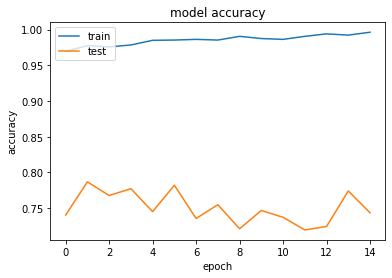

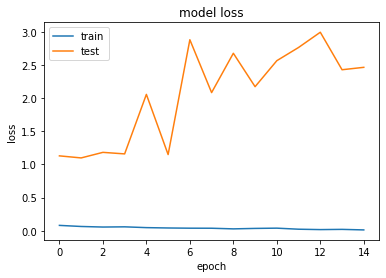

In [121]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [122]:
print('Accuracy of train is:',max(history.history['acc']))
print('Accuracy of test is:',max(history.history['val_acc']))

Accuracy of train is: 0.99616563
Accuracy of test is: 0.786859


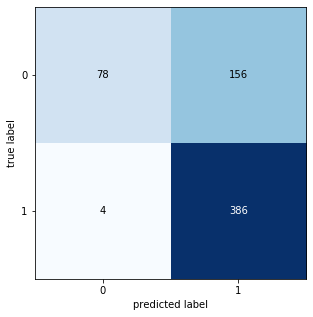

In [123]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
#y_true = np.argmax(y_test,axis = 1)

CM = confusion_matrix(y_test, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [124]:
print('The sensitivity is:',(386/(386+4)*100))
print('The specificity is:', (78/(78+156)*100))

The sensitivity is: 98.97435897435898
The specificity is: 33.33333333333333


What’s a ‘good’ test? It depends

The ideal test is one that has both high sensitivity and high specificity, but the value of a test depends on the situation.

Generally speaking, a test with a sensitivity and specificity of around 90% would be considered to have good diagnostic performance.
The issue of false alarms is solved when testing is done sequentially in a two-step process.

The initial tests are selected because they have high sensitivity (>99% in the case of HIV tests), the expectation is that these tests do not miss patients with disease–and that all of those with positive tests (which could be a large proportion) will then undergo the highly-specific diagnostic gold standard test to confirm the diagnosis.

The second step is meant to rule out any false-positives resulting from the first test.